## Part I. Preprocessing data

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


df = pd.read_excel("test_data1.xlsx")
df['Sale'] = df['amount']/df['quantity']  # Set the sale for each unique ID
df['PoS'] = 1  # Set default value for Part of Sales for each UID 
df.head()

,Week_ending,Uid code,Brand new,Size short,Diet dummy,Container,quantity,amount,ND,Sale,PoS
0,201500,0,Other,400ml,0,Can,222,22502.0,0.065934,101.360360,1
1,201500,2,Other,400ml,0,Glass,14744,2157921.0,0.791209,146.359265,1
2,201500,8,Other,350ml,0,Can,14218,561888.0,0.461538,39.519482,1
3,201500,9,Other,350ml,0,Glass,46848,4541924.0,0.879121,96.950222,1
4,201500,10,Other,350ml,1,Can,61756,1683835.0,0.406593,27.265934,1


In [2]:
ls = list(df['Uid code'])
c = Counter(ls)
len(sorted(c.most_common(100)))  # 71 Unique ID in total

71

In [3]:
tmp_we = 201500

tmp_q = np.array(df[df['Week_ending'] == tmp_we]['quantity'])

tmp_q.sum()

2267976

In [4]:
df.loc[df['Week_ending'] == tmp_we, 'PoS'] = df['quantity']/tmp_q.sum()
one = np.array(df.loc[df['Week_ending'] == tmp_we, 'PoS']).sum()
df.head()

,Week_ending,Uid code,Brand new,Size short,Diet dummy,Container,quantity,amount,ND,Sale,PoS
0,201500,0,Other,400ml,0,Can,222,22502.0,0.065934,101.360360,0.000098
1,201500,2,Other,400ml,0,Glass,14744,2157921.0,0.791209,146.359265,0.006501
2,201500,8,Other,350ml,0,Can,14218,561888.0,0.461538,39.519482,0.006269
3,201500,9,Other,350ml,0,Glass,46848,4541924.0,0.879121,96.950222,0.020656
4,201500,10,Other,350ml,1,Can,61756,1683835.0,0.406593,27.265934,0.027230


In [5]:
tmp_we = 201500

tmp_q = np.array(df[df['Week_ending'] == tmp_we]['quantity'])

def set_PoS(i):
    """Function for calculating Part of Sales for each Uid"""
    tmp_we = i
    tmp_q = np.array(df[df['Week_ending'] == tmp_we]['quantity'])
    tmp_total = tmp_q.sum()
    df.loc[df['Week_ending'] == tmp_we, 'PoS'] = df['quantity']/tmp_total
    one = np.array(df.loc[df['Week_ending'] == tmp_we, 'PoS']).sum()
    if round(one) != 1:
#         print(one)
        raise ValueError

for i in range(201501, 201553):
    set_PoS(i)
for i in range(201601, 201653):
    set_PoS(i)
for i in range(201701, 201754):
    set_PoS(i)
for i in range(201801, 201826):
    set_PoS(i)
    
df.tail()

,Week_ending,Uid code,Brand new,Size short,Diet dummy,Container,quantity,amount,ND,Sale,PoS
9348,201825,66,Coca,500ml,0,PET,2399237,189001378.0,0.992424,78.775618,0.234306
9349,201825,67,Coca,500ml,0,Can,47513,3312596.0,0.227273,69.719782,0.004640
9350,201825,68,Fanta,500ml,0,Can,18764,1295543.0,0.189394,69.044074,0.001832
9351,201825,69,Fanta,500ml,0,PET,1280767,100298071.0,0.984848,78.310943,0.125078
9352,201825,70,Fanta,500ml,0,Bottle_Can,1597,122333.0,0.022727,76.601753,0.000156


In [6]:
tmp_q = np.array(df[df['Week_ending'] == 201825]['quantity']).sum()  # Checking

In [7]:
# df.to_csv("final_data.csv")

In [8]:
df.head()

,Week_ending,Uid code,Brand new,Size short,Diet dummy,Container,quantity,amount,ND,Sale,PoS
0,201500,0,Other,400ml,0,Can,222,22502.0,0.065934,101.360360,0.000098
1,201500,2,Other,400ml,0,Glass,14744,2157921.0,0.791209,146.359265,0.006501
2,201500,8,Other,350ml,0,Can,14218,561888.0,0.461538,39.519482,0.006269
3,201500,9,Other,350ml,0,Glass,46848,4541924.0,0.879121,96.950222,0.020656
4,201500,10,Other,350ml,1,Can,61756,1683835.0,0.406593,27.265934,0.027230


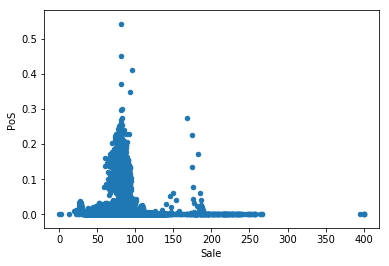

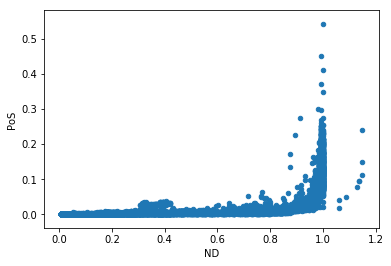

In [9]:
nd = df[df['Uid code'] == 0]['ND']
df1 = df[df['Week_ending'] == 201500]
df.plot.scatter(x=9, y=10)
df.plot.scatter(x=8, y=10)

## Part II. Training
### CASE 1

### Train model for first (0) Uid as example

In [10]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [11]:
df0 = df[df['Uid code'] == 0].copy()
df.head()

,Week_ending,Uid code,Brand new,Size short,Diet dummy,Container,quantity,amount,ND,Sale,PoS
0,201500,0,Other,400ml,0,Can,222,22502.0,0.065934,101.360360,0.000098
1,201500,2,Other,400ml,0,Glass,14744,2157921.0,0.791209,146.359265,0.006501
2,201500,8,Other,350ml,0,Can,14218,561888.0,0.461538,39.519482,0.006269
3,201500,9,Other,350ml,0,Glass,46848,4541924.0,0.879121,96.950222,0.020656
4,201500,10,Other,350ml,1,Can,61756,1683835.0,0.406593,27.265934,0.027230


In [12]:
x0 = df0[['Sale', 'ND']].values
y0 = df0['PoS'].values

X_train0, X_test0, Y_train0, Y_test0 = train_test_split(x0, y0, test_size=0.2, random_state=0)

model = LinearRegression().fit(X_train0, Y_train0)
coeff_df = pd.DataFrame(model.coef_, df0[['Sale', 'ND']].columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Sale,-0.000002
ND,0.001044


In [13]:
y_pred = model.predict(X_test0)
df_pred = pd.DataFrame({'Actual': Y_test0, 'Predicted': y_pred})
df_pred[:]

,Actual,Predicted
0,0.000061,3.012440e-05
1,0.000041,9.049136e-05
2,0.000045,7.789743e-05
3,0.000047,6.816470e-05
4,0.000107,8.727854e-05
5,0.000094,9.051924e-05
6,0.000051,8.522870e-05
7,0.000109,9.043821e-05
8,0.000039,6.216455e-05
9,0.000029,2.264649e-05


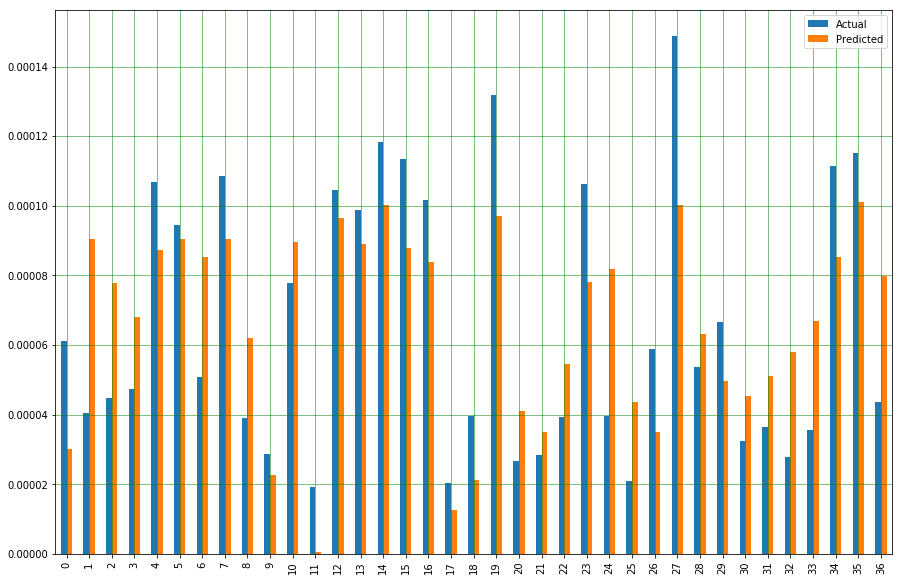

In [14]:
df1 = df_pred.head(50)
df1.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Case 2
#### Function for calculating Linear Regression for each Uid

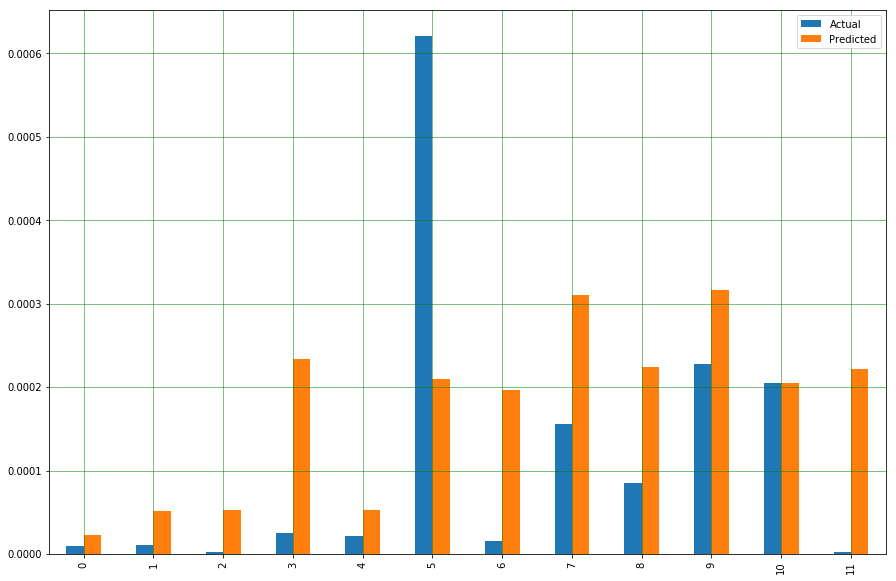

In [18]:
def get_uid_model(uid: int, df):
    main_df = df[df['Uid code'] == uid].copy()
    x = main_df[['Sale', 'ND']].values
    y = main_df['PoS'].values
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    model = LinearRegression().fit(X_train, Y_train)
    coeff_df = pd.DataFrame(model.coef_, main_df[['Sale', 'ND']].columns, columns=['Coefficient'])
    y_pred = model.predict(X_test)
    df_pred = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
    return model, coeff_df, df_pred

def show_plt(df_pred):
    main_df = df_pred
    main_df.plot(kind='bar',figsize=(15,10))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()

model0, c0, df_pred0 = get_uid_model(70, df)
show_plt(df_pred0)

### Show graphs

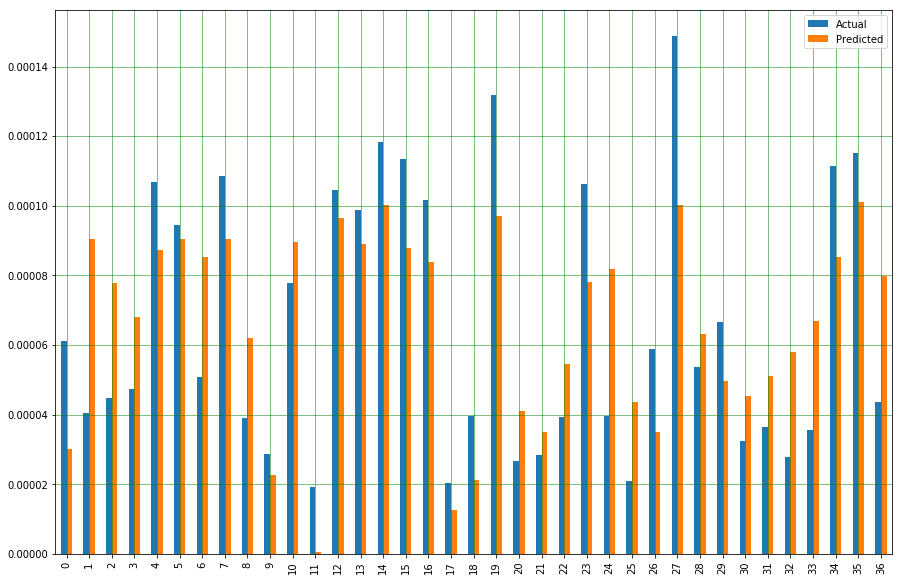

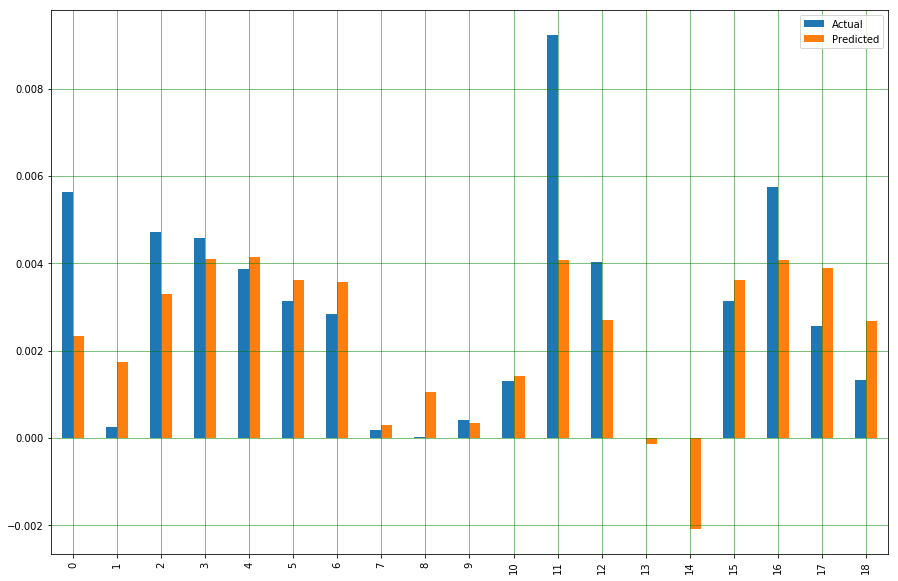

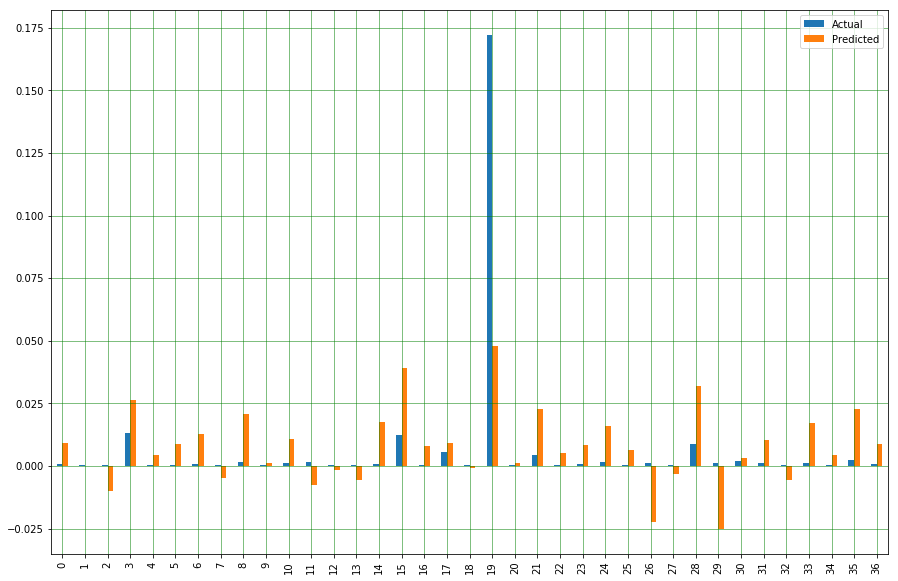

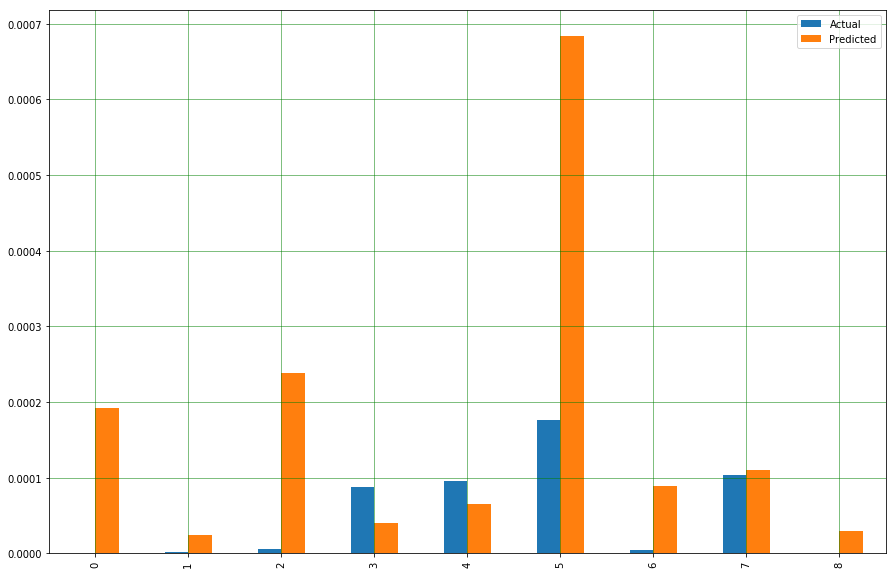

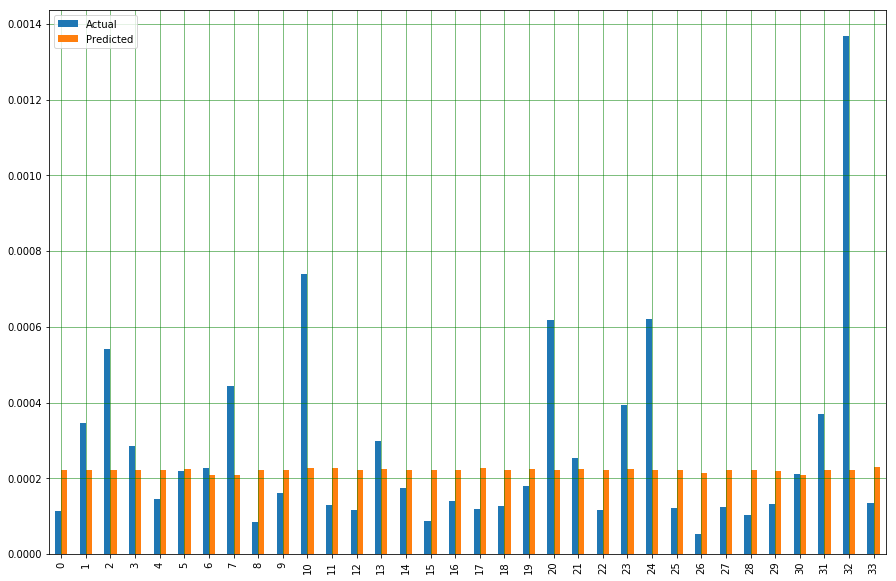

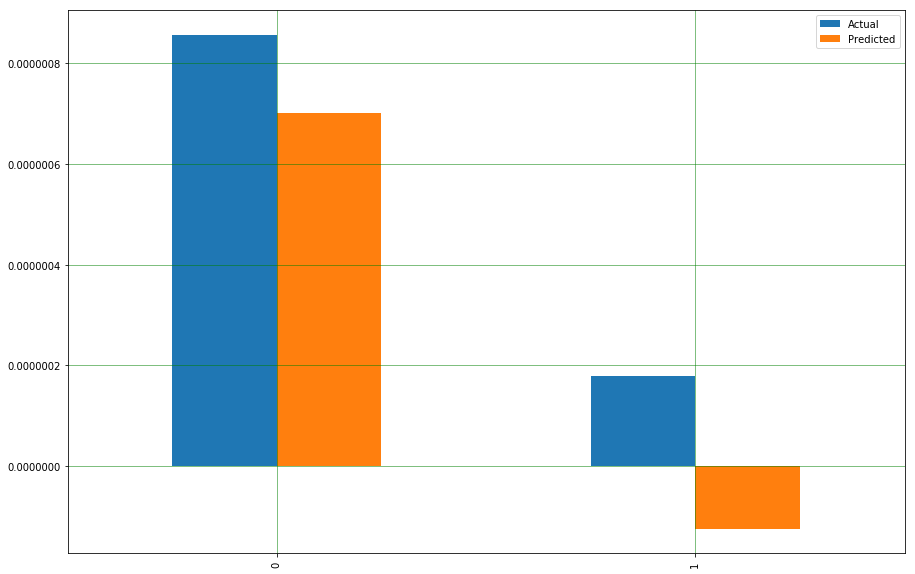

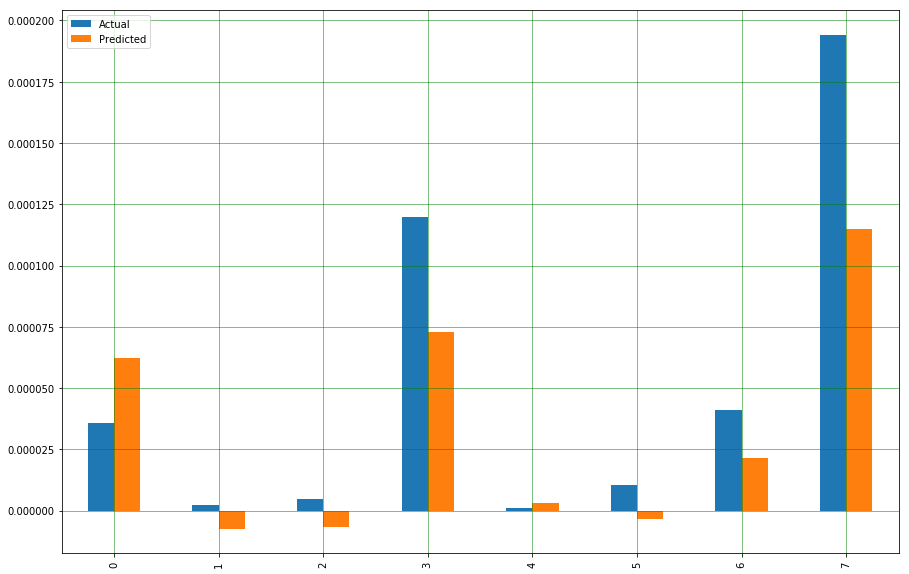

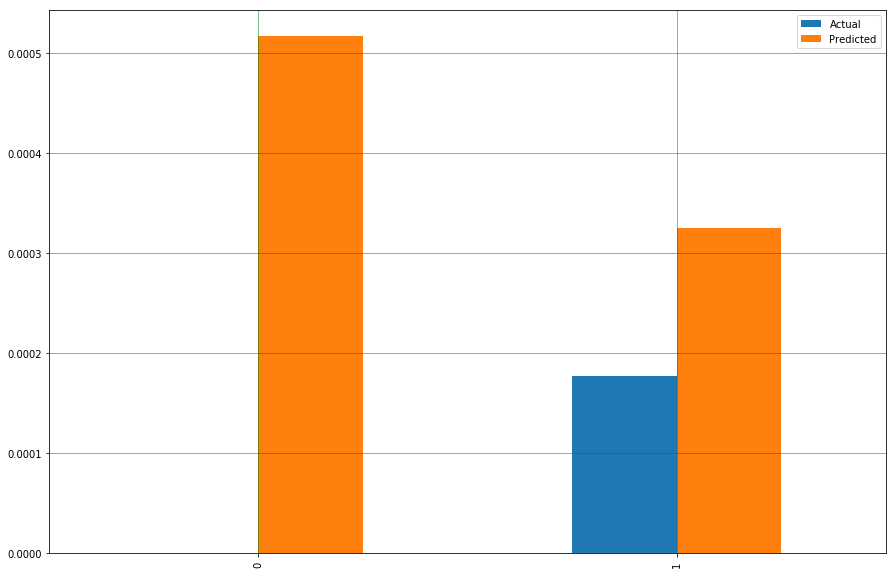

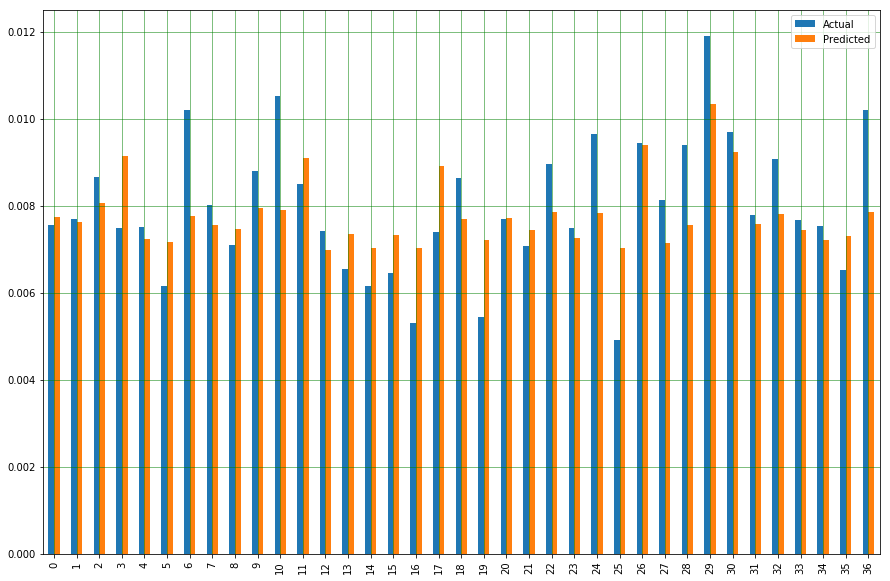

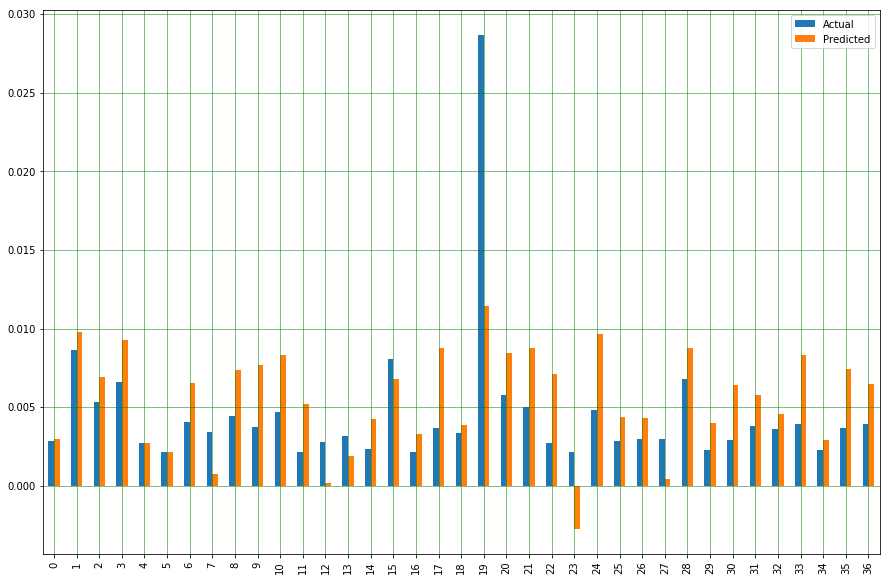

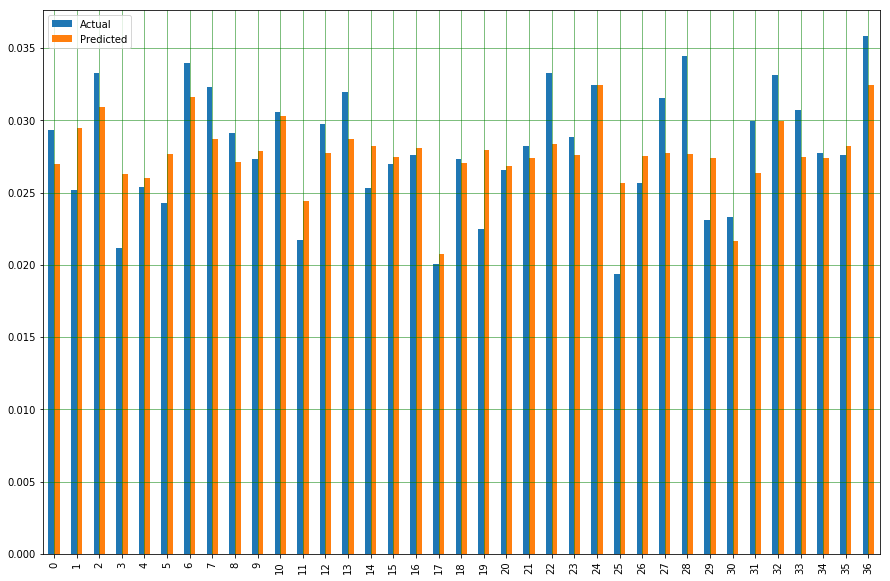

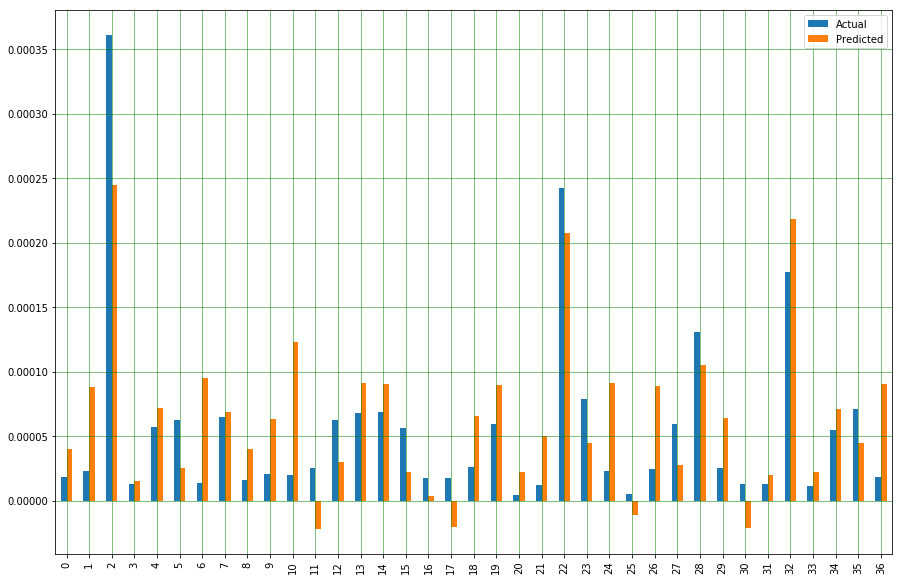

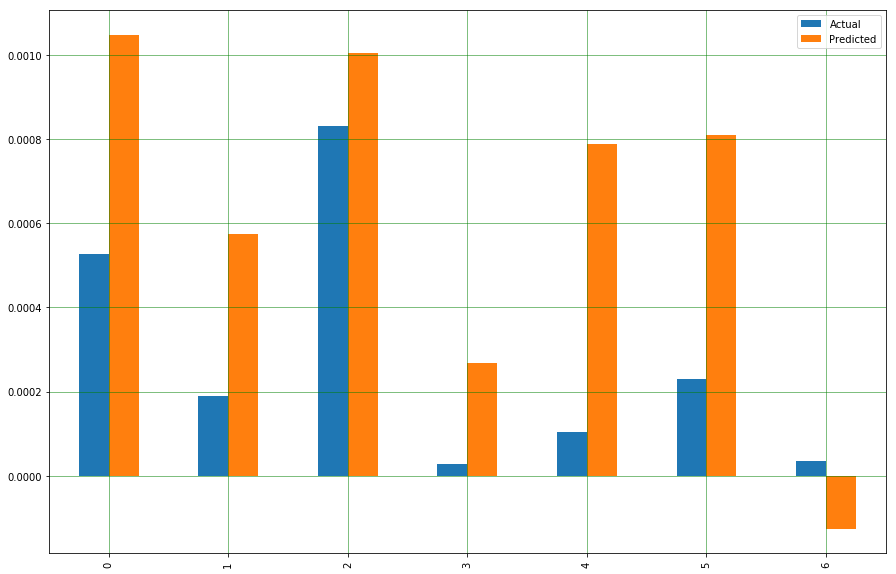

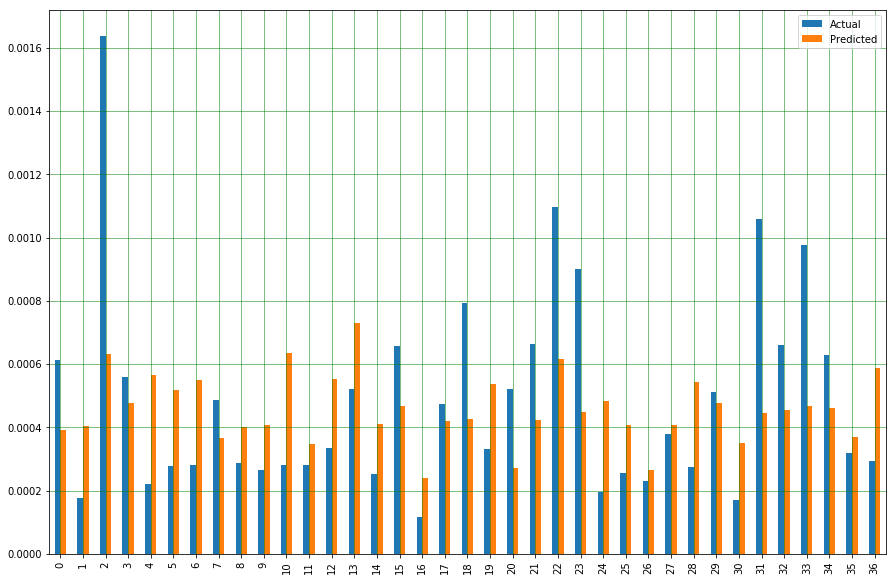

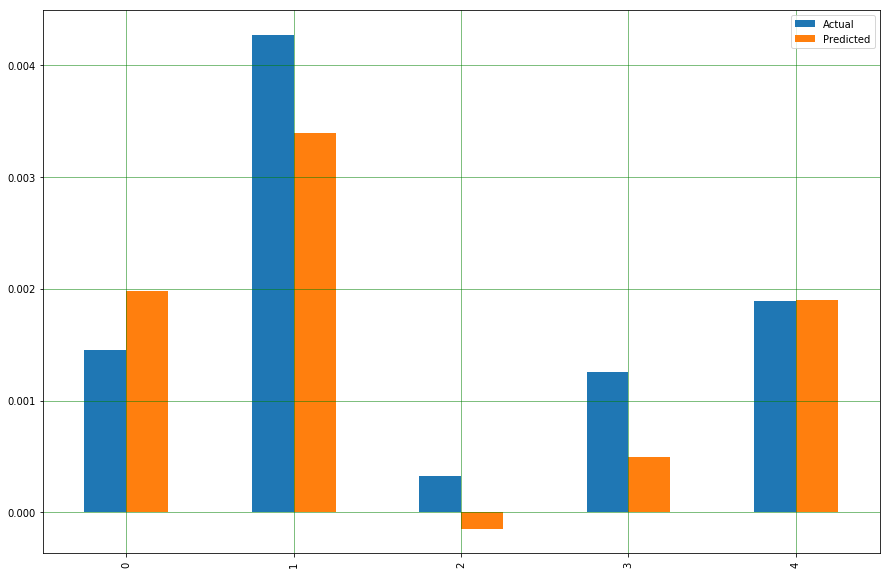

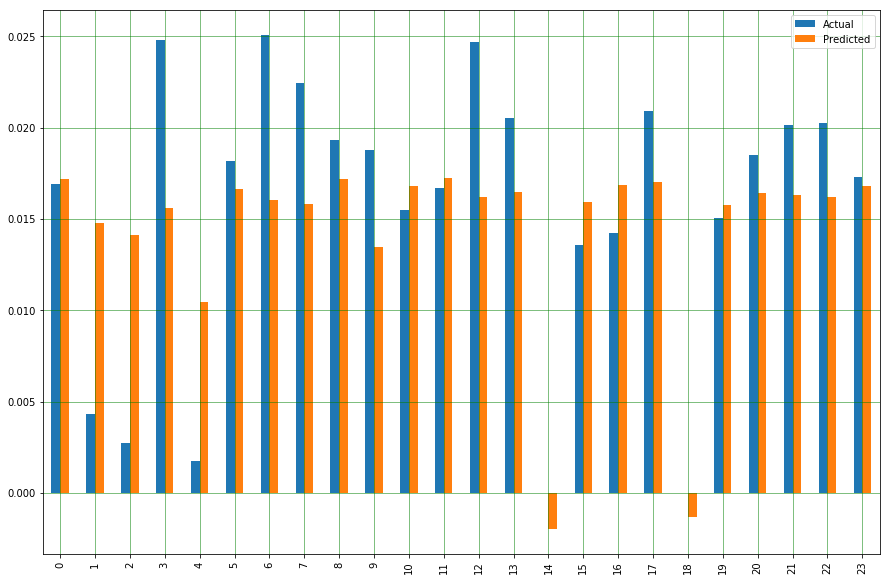

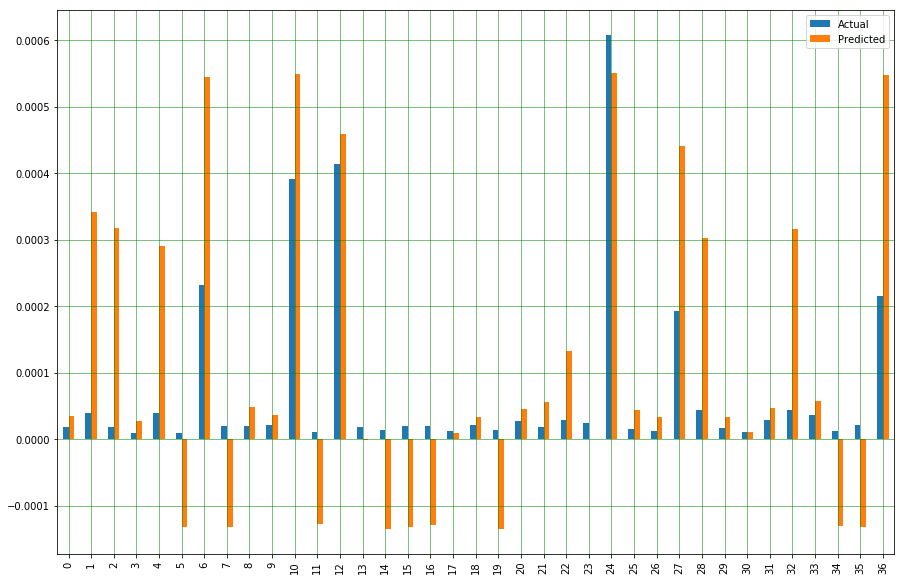

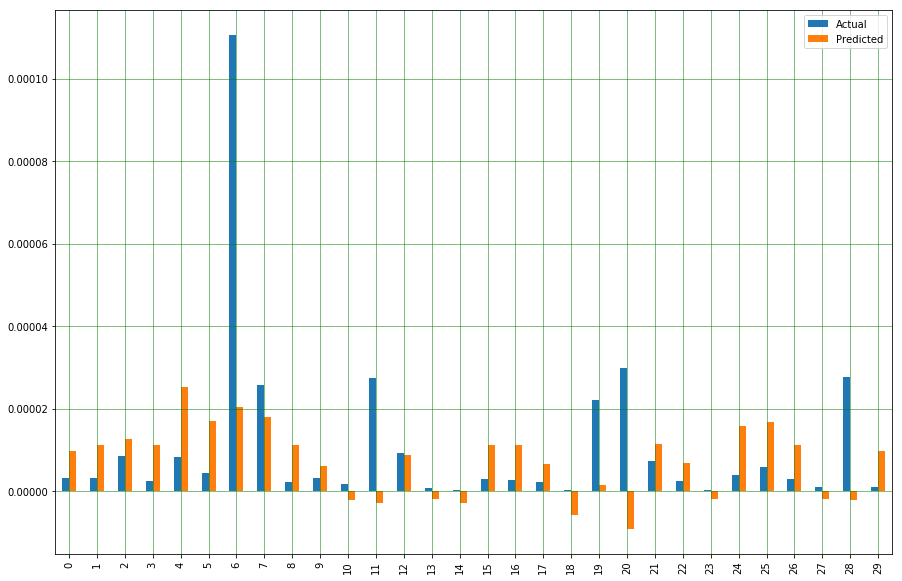

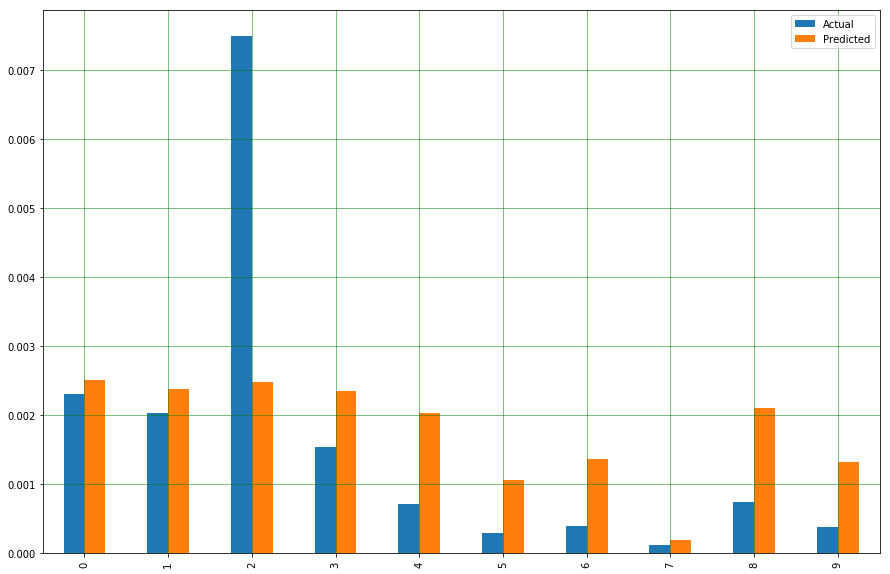

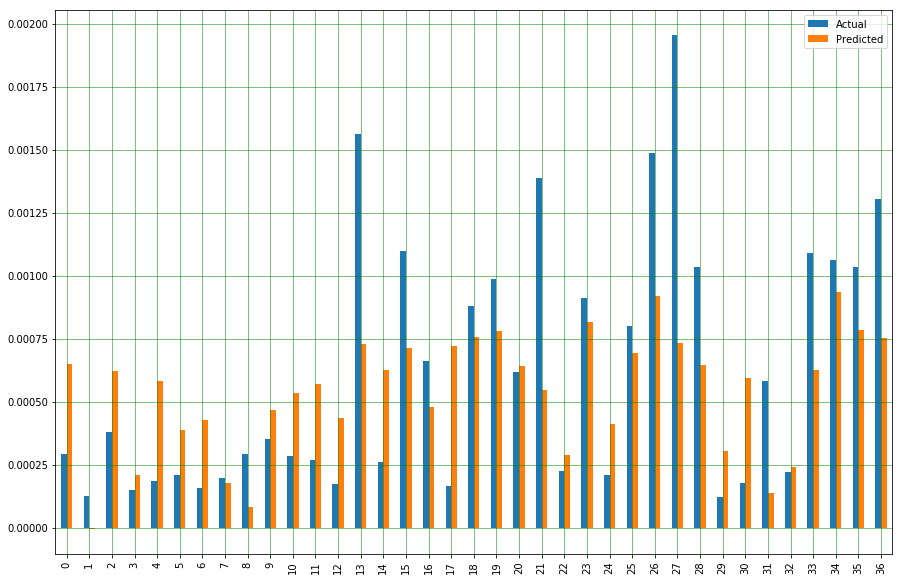

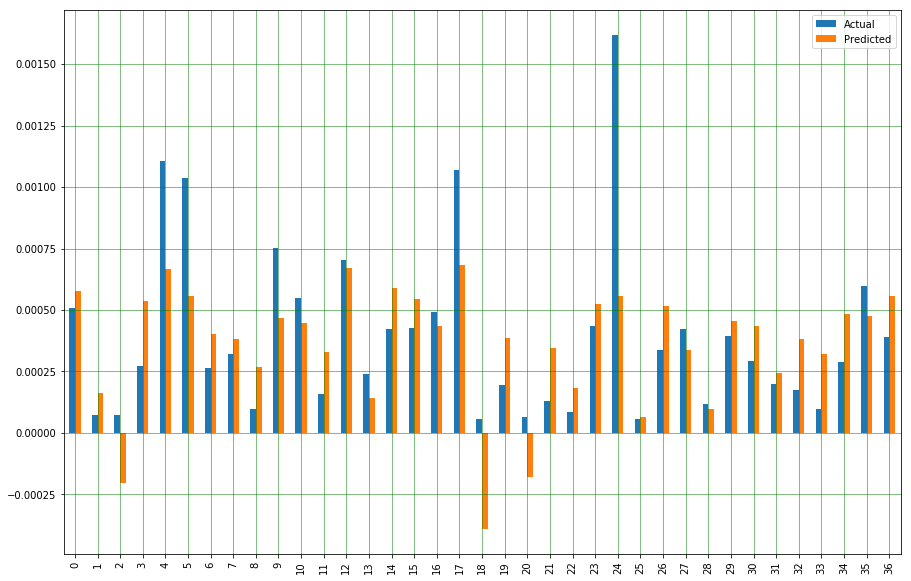

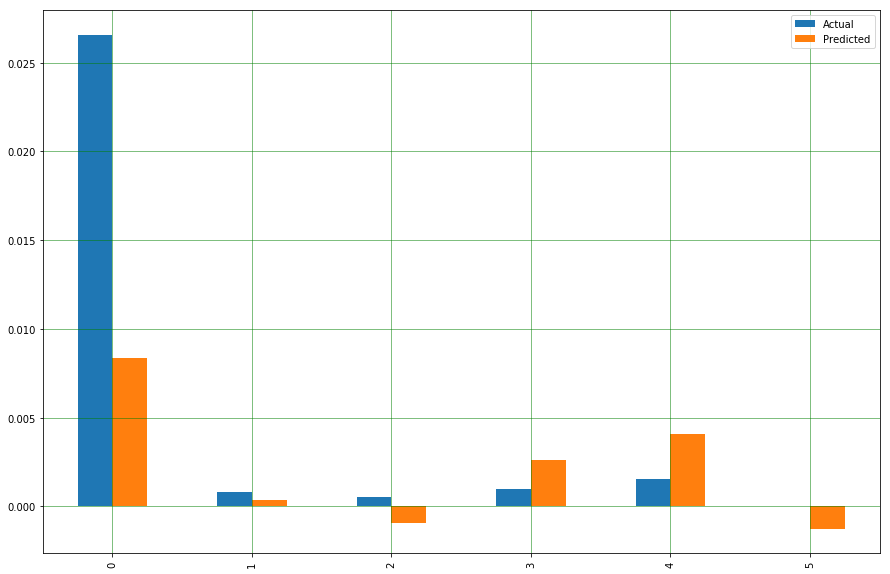

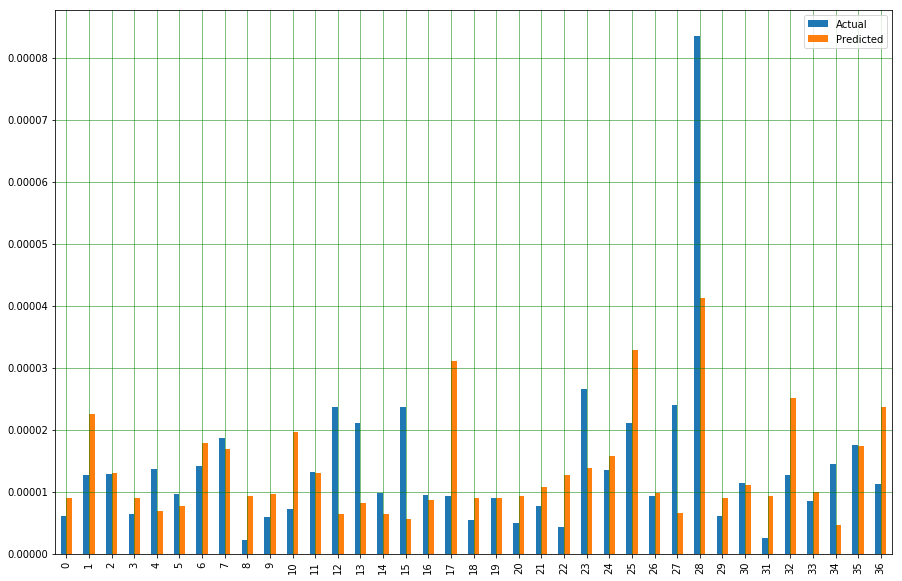

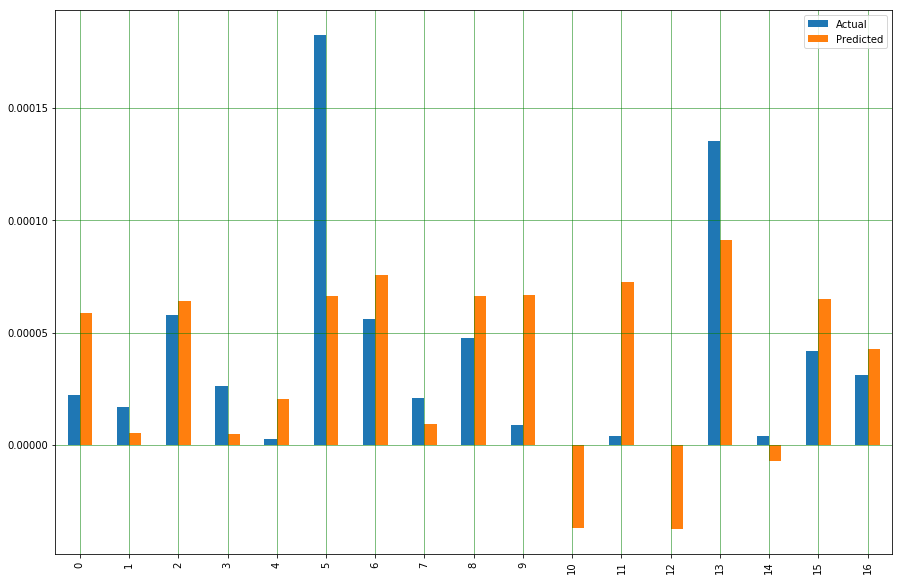

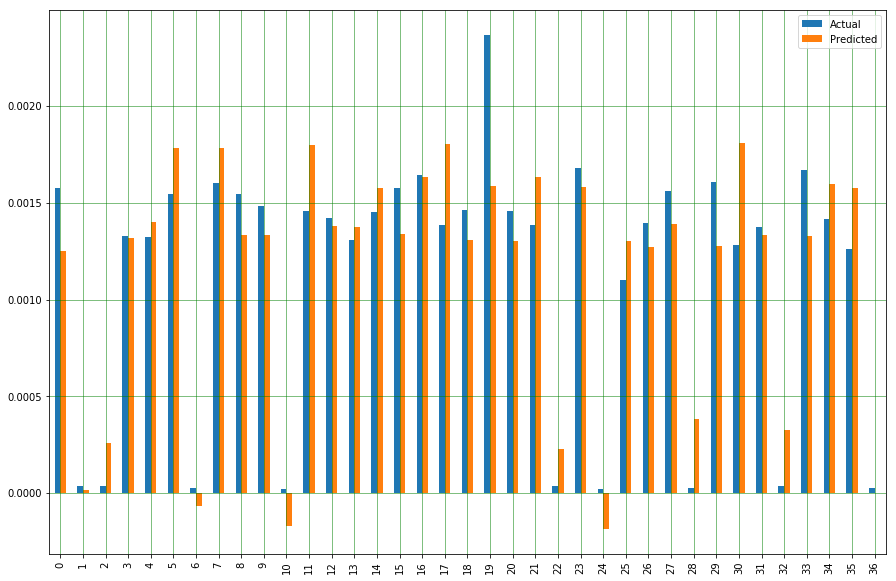

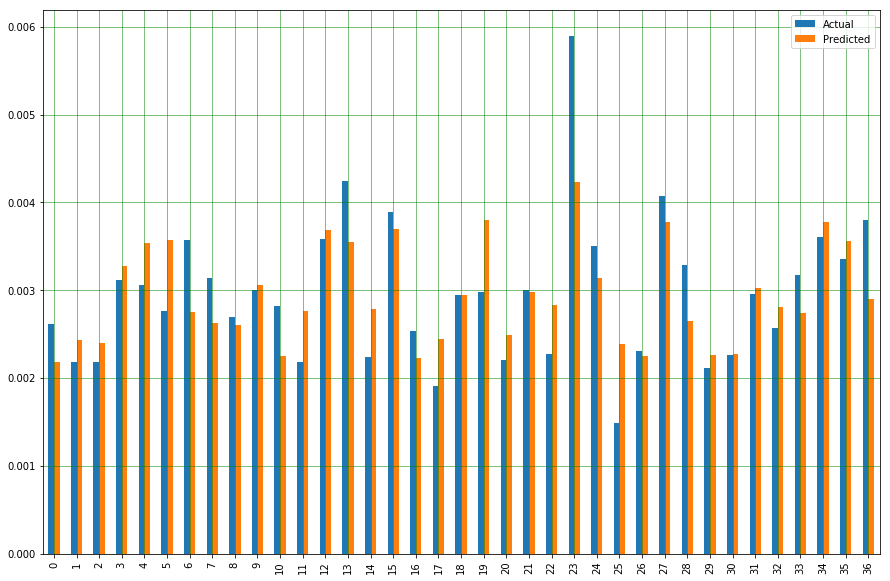

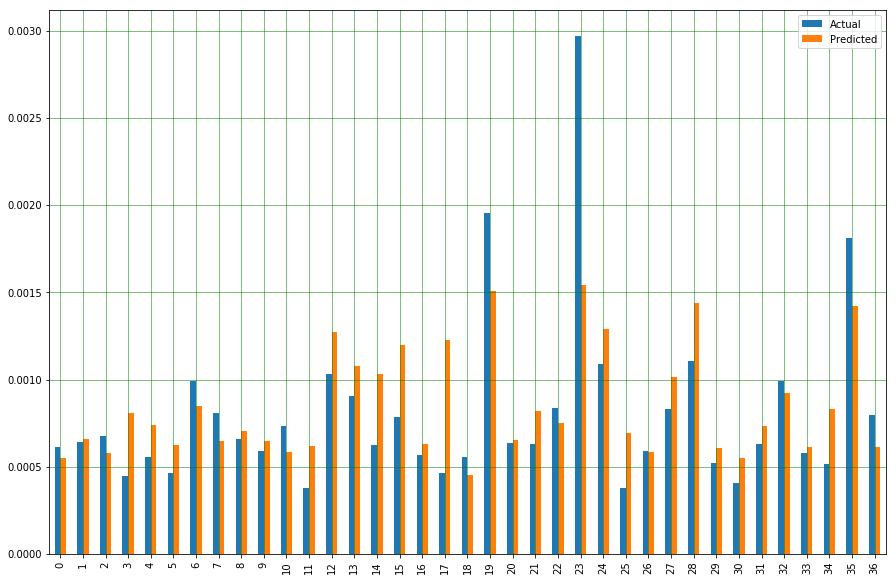

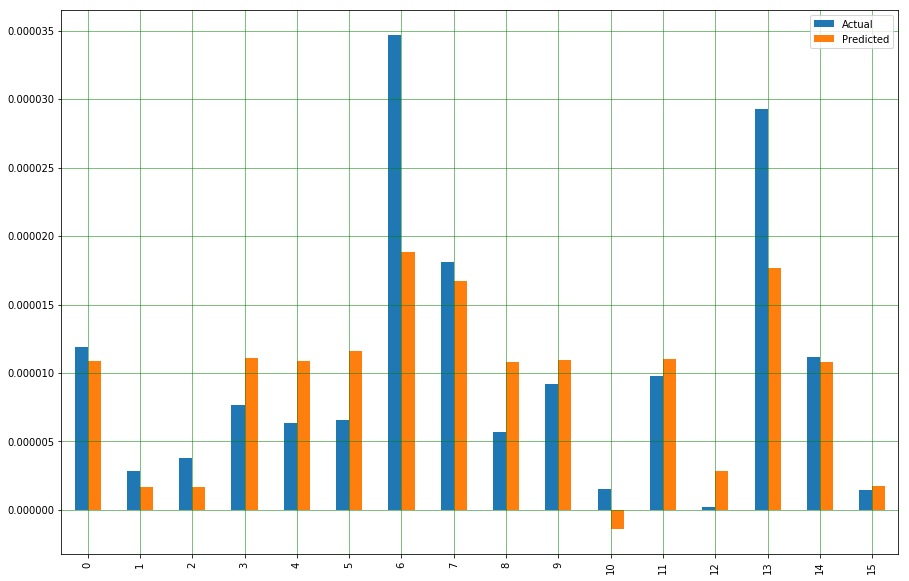

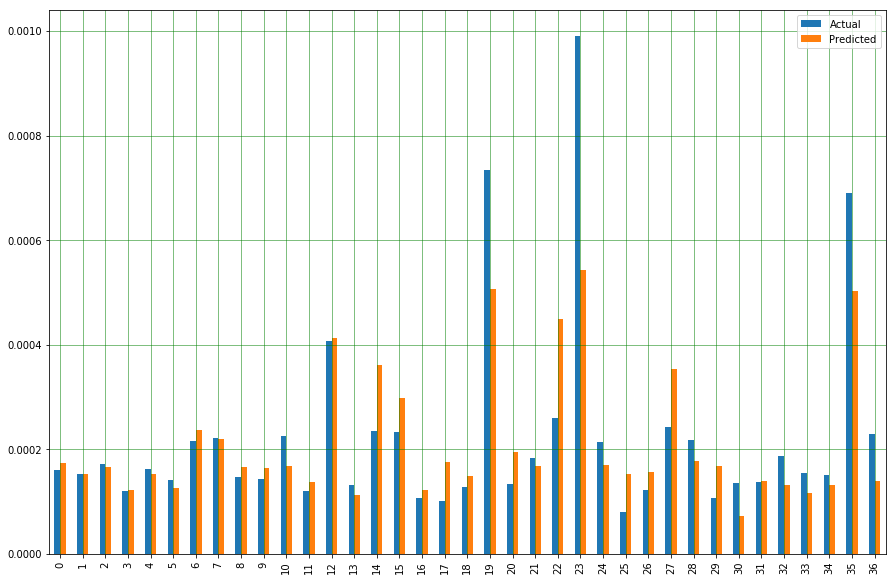

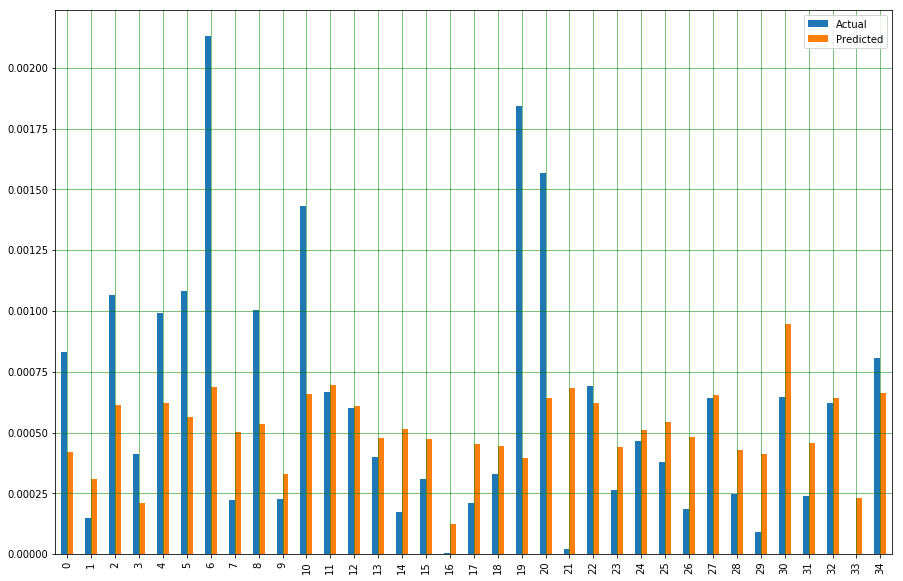

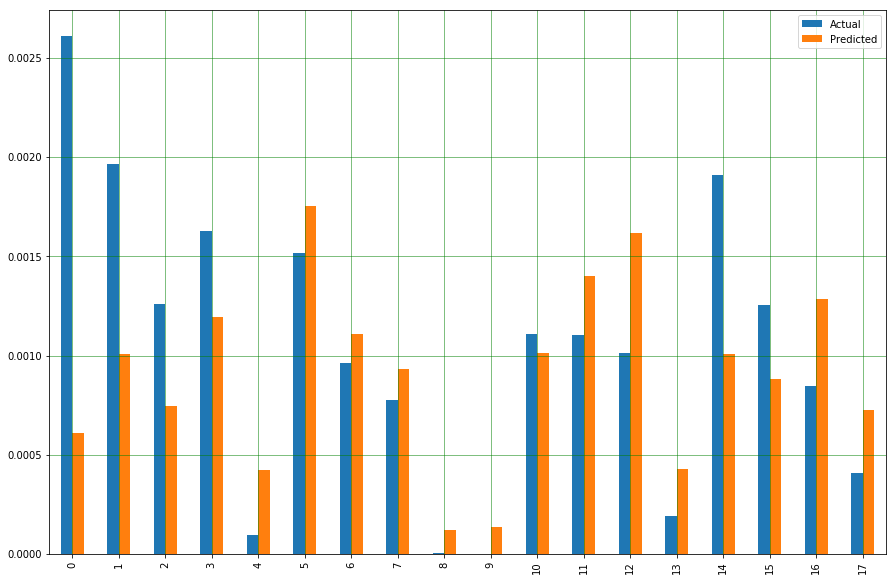

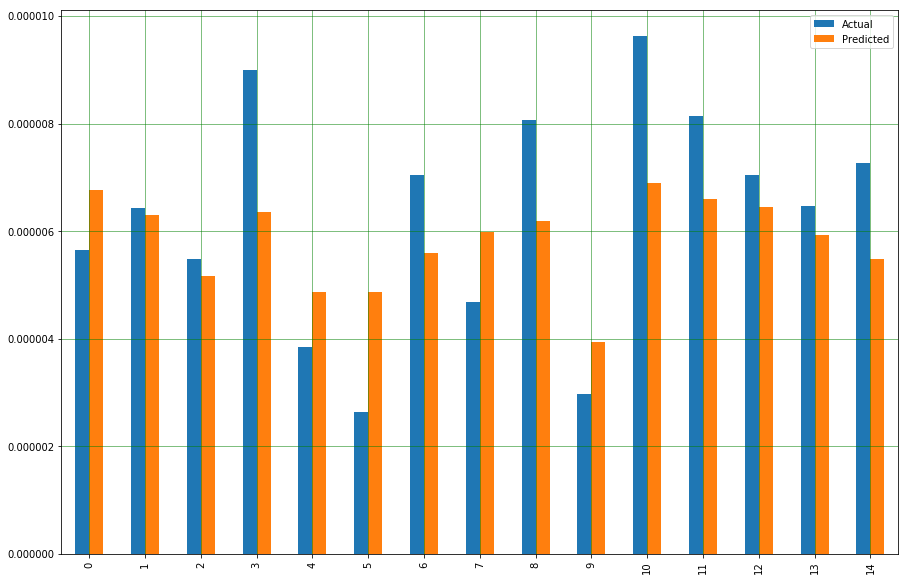

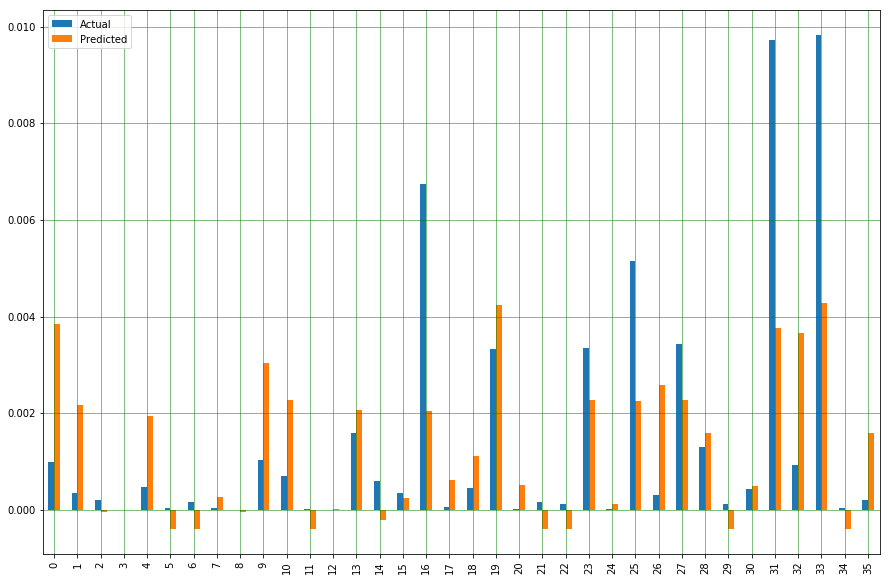

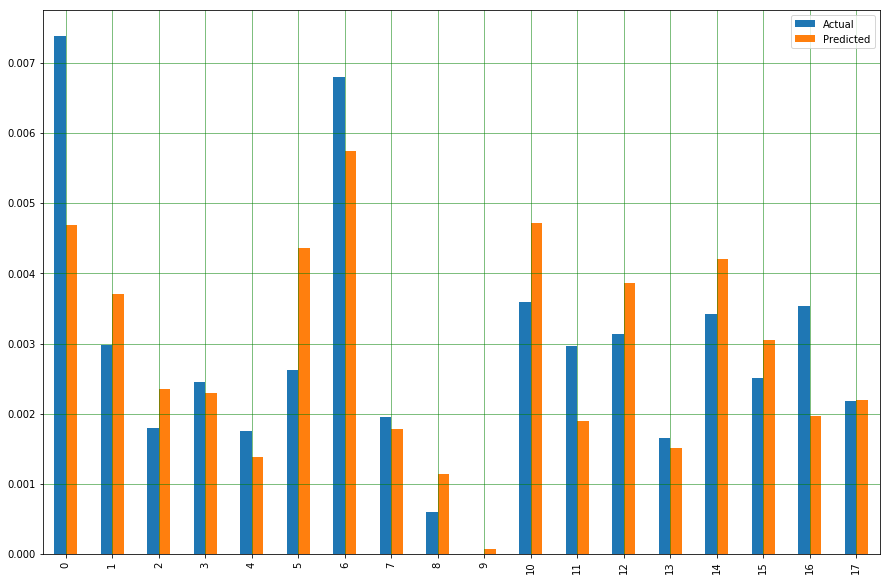

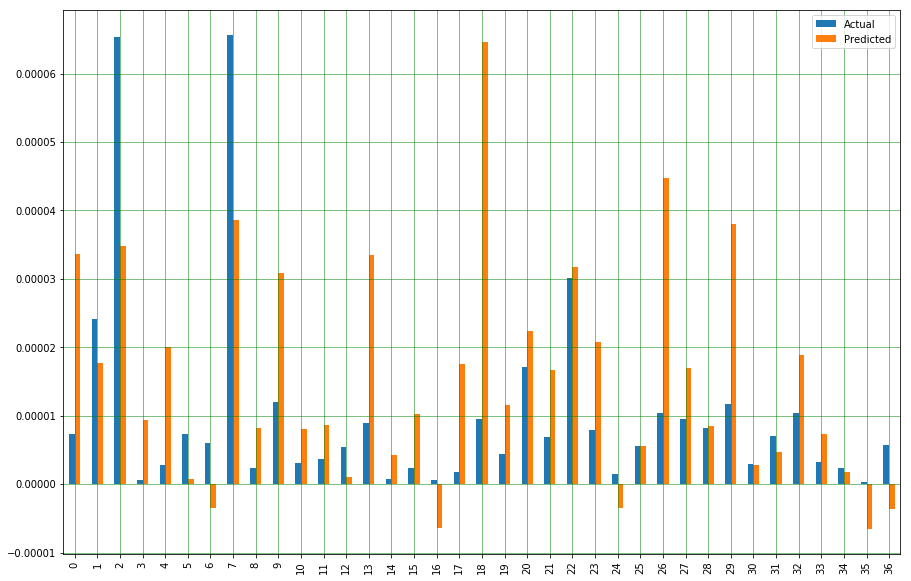

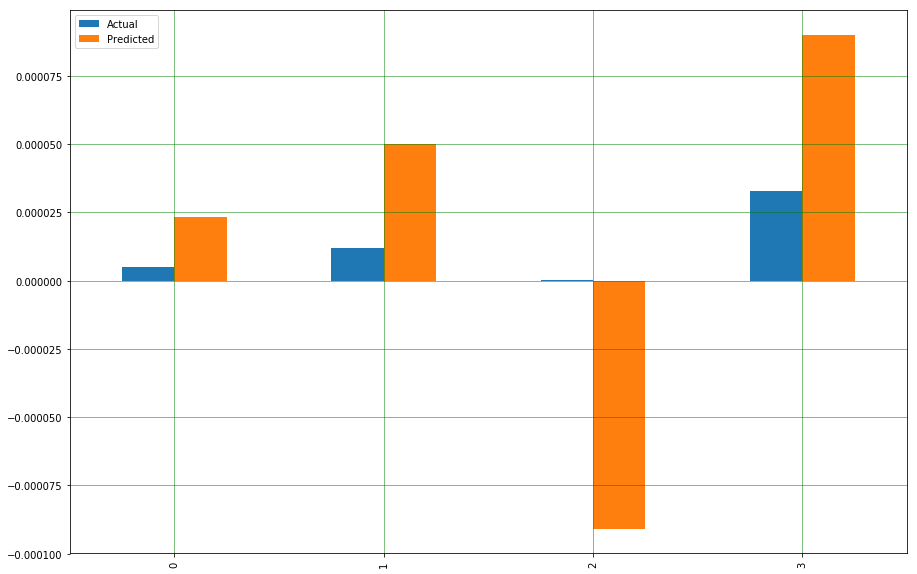

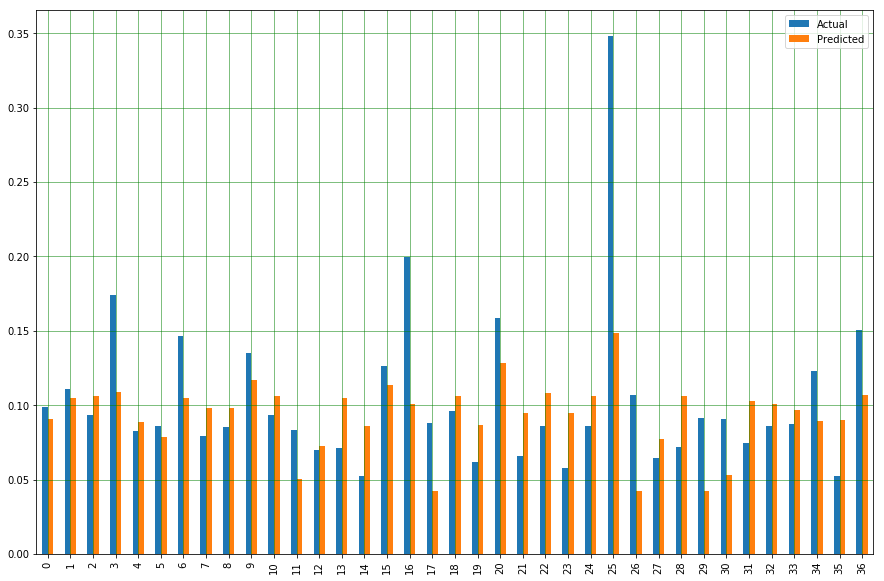

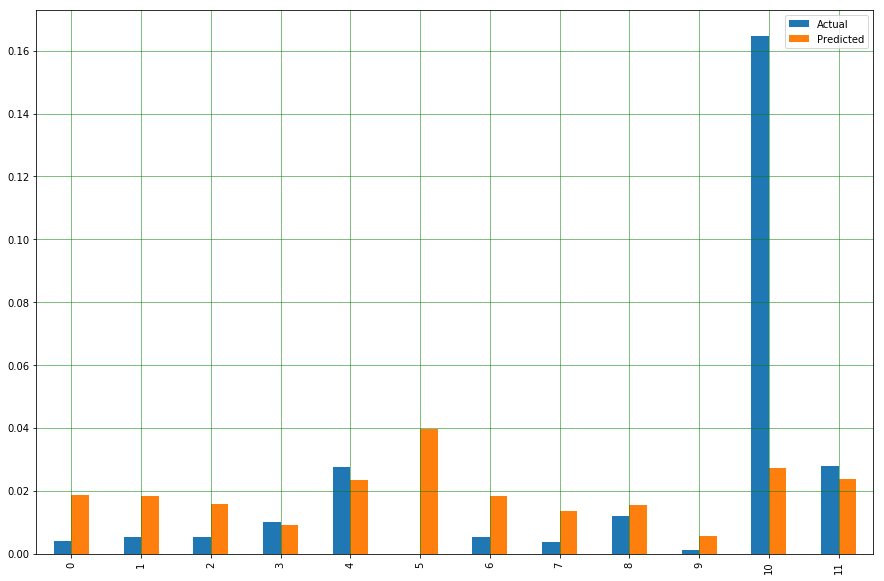

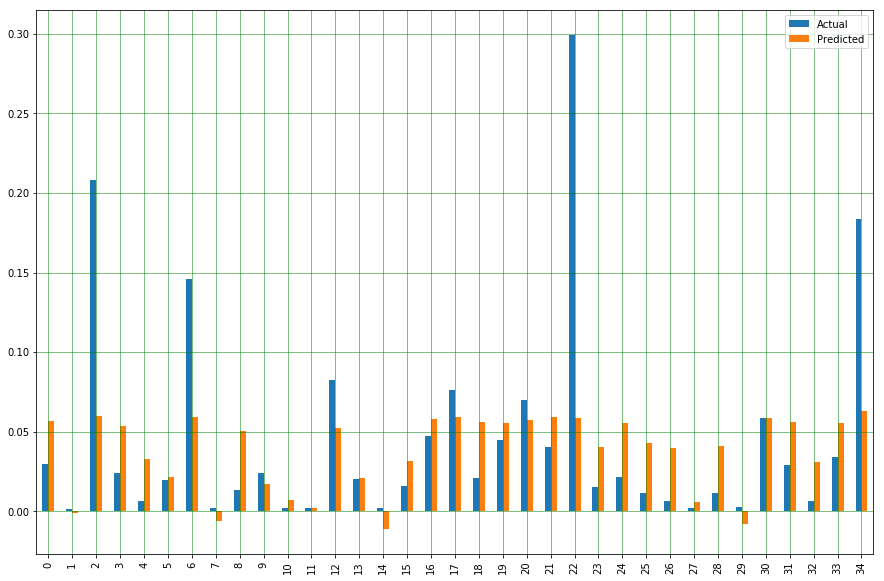

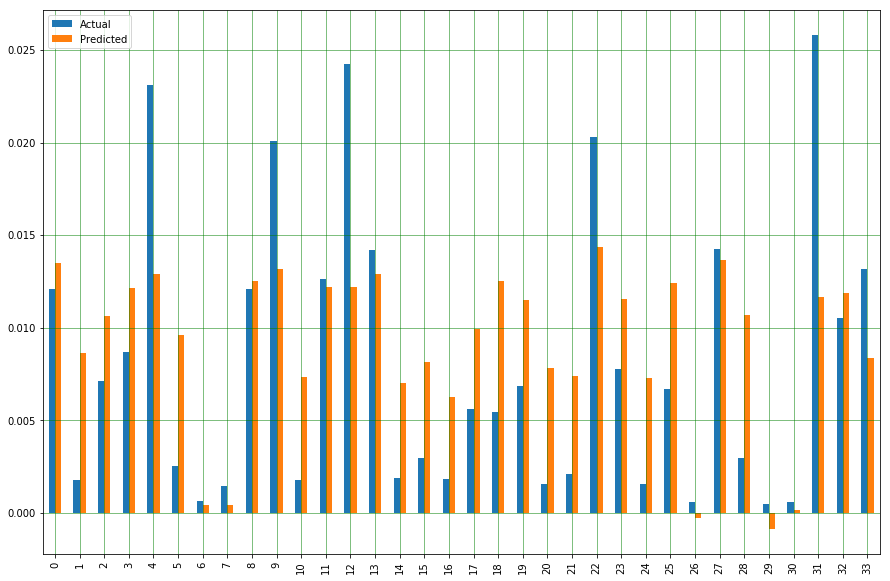

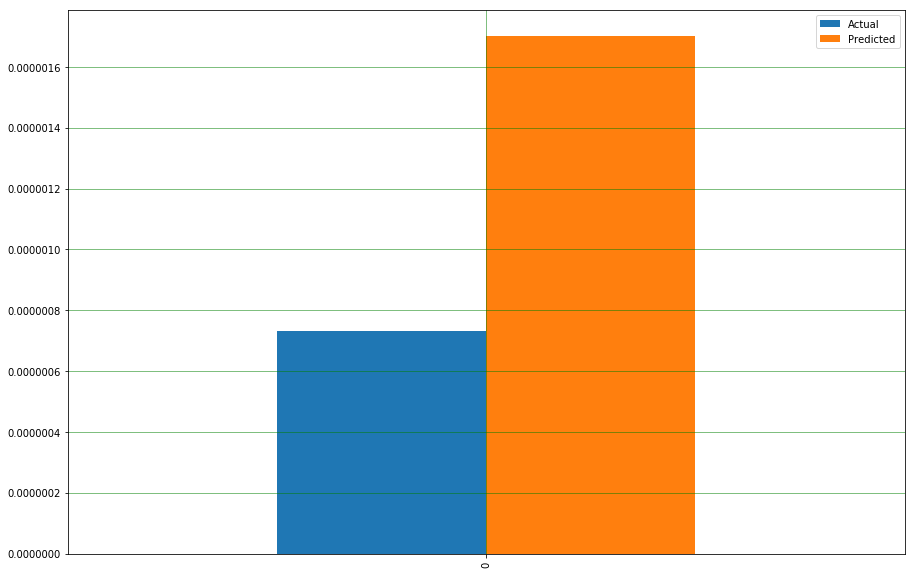

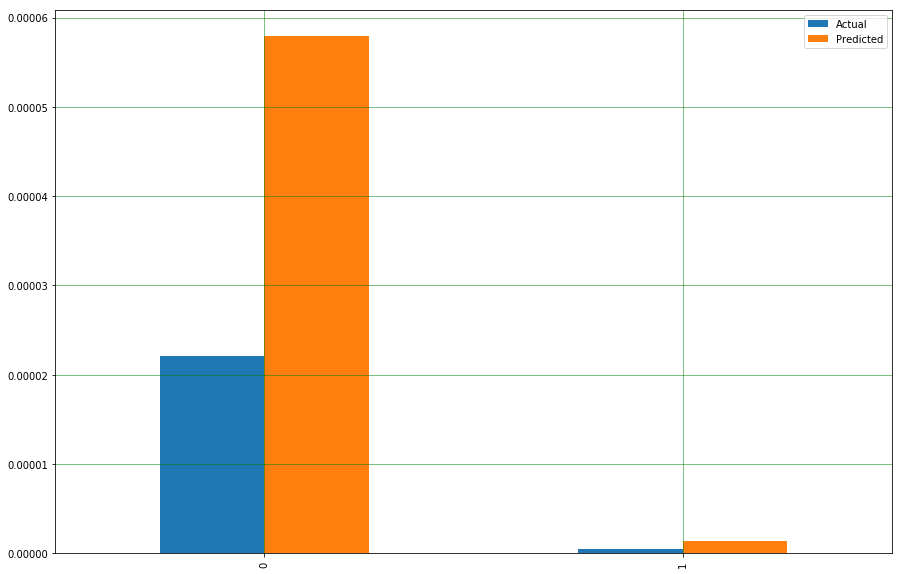

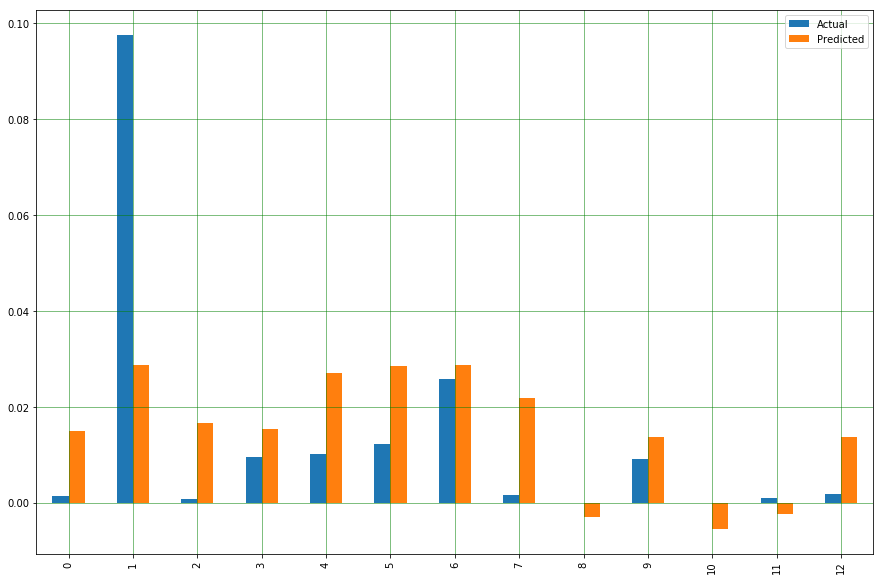

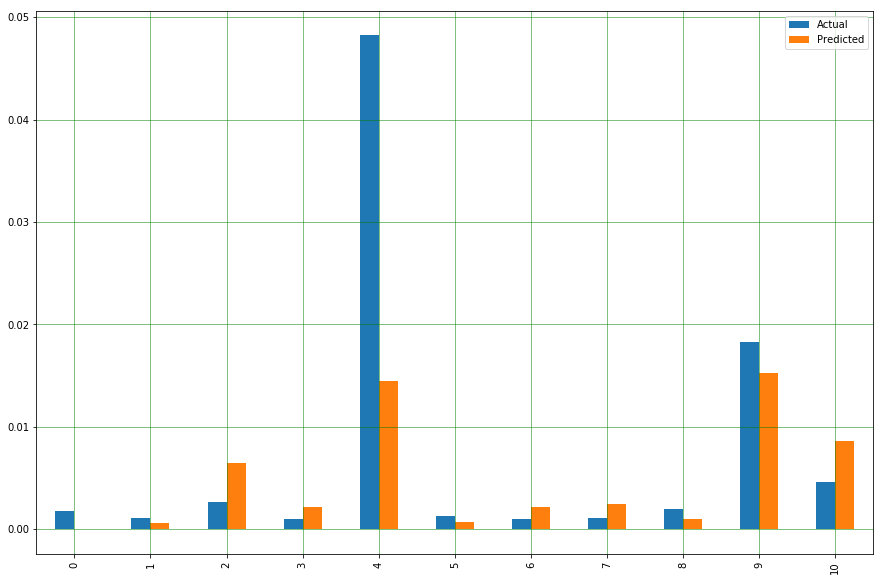

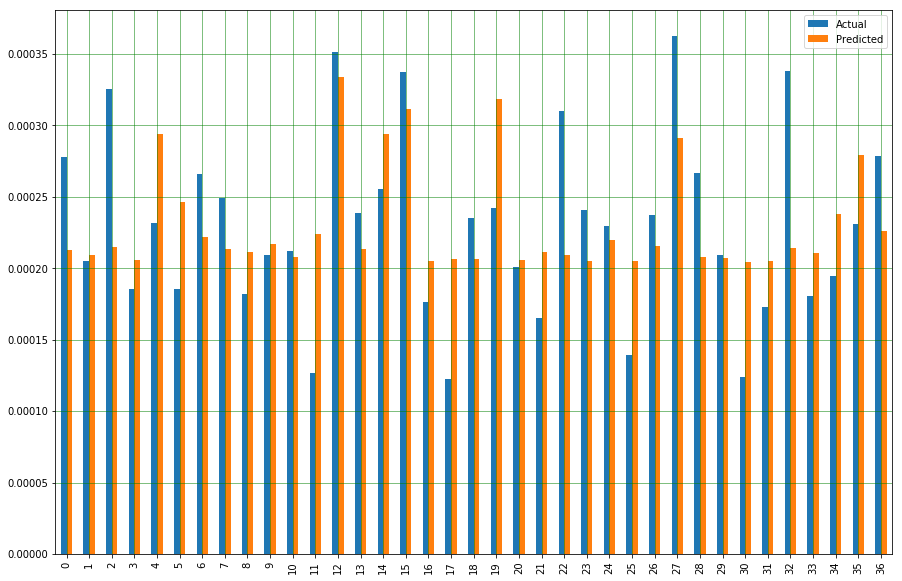

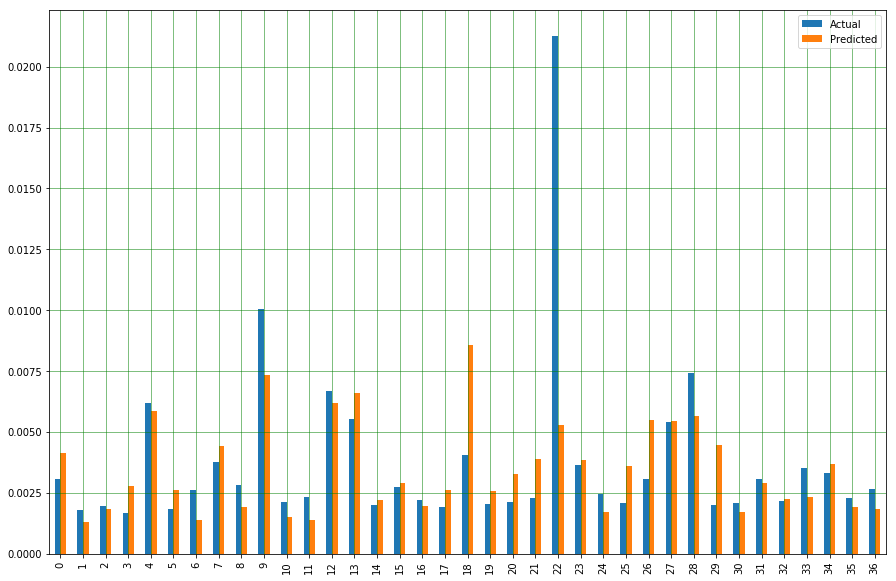

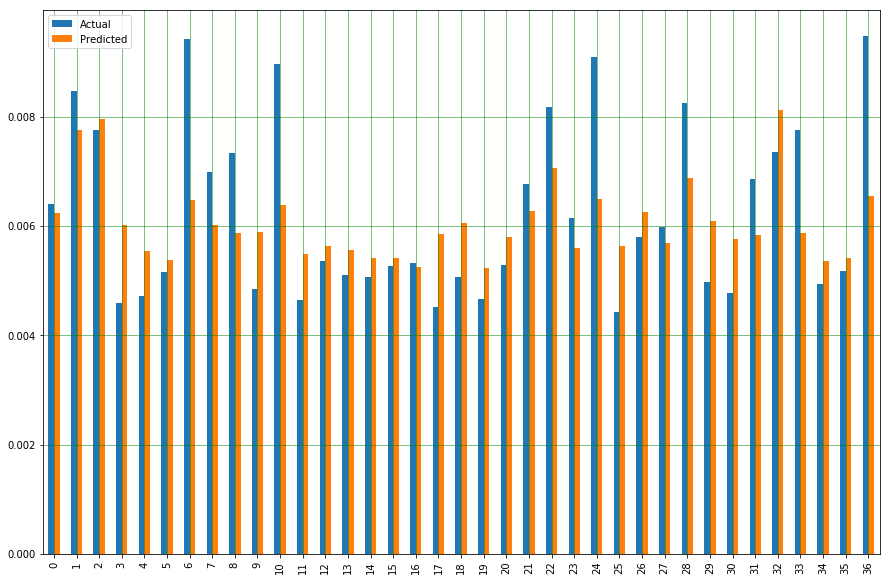

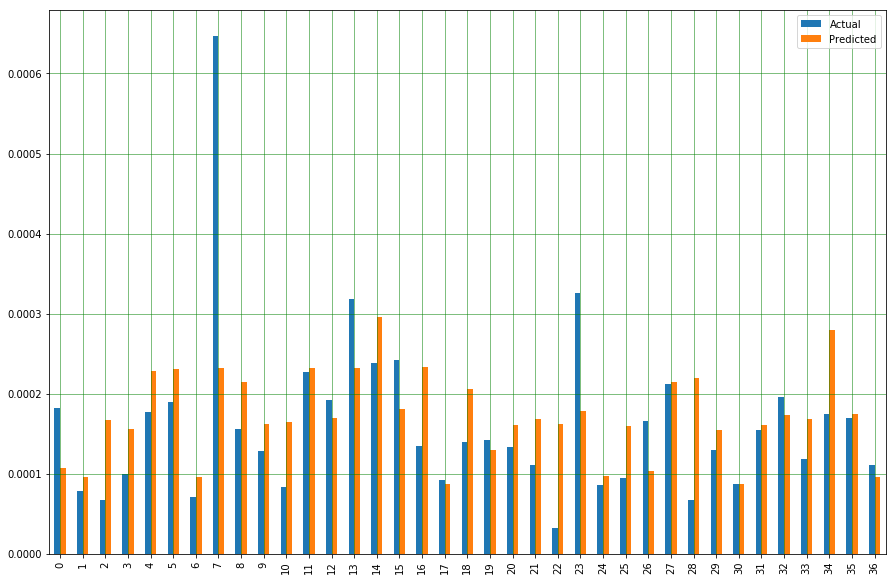

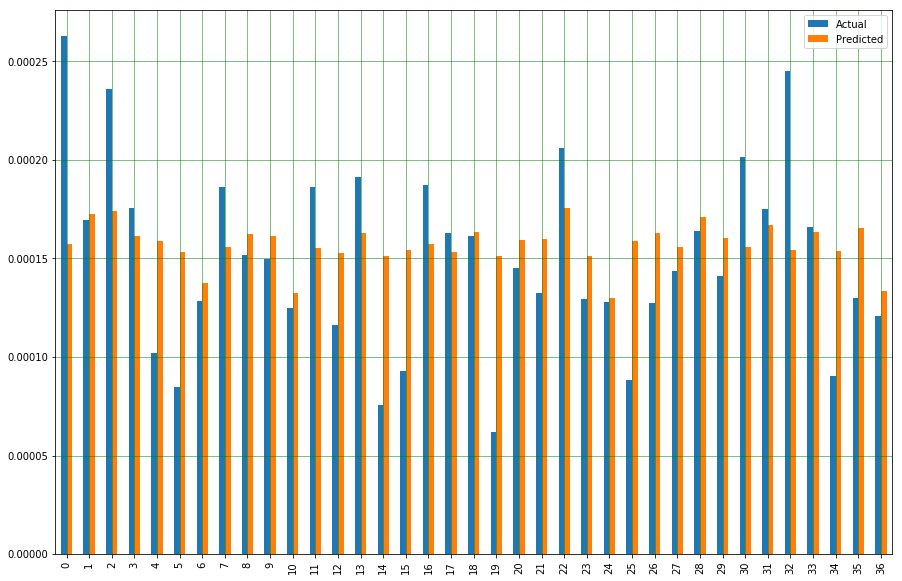

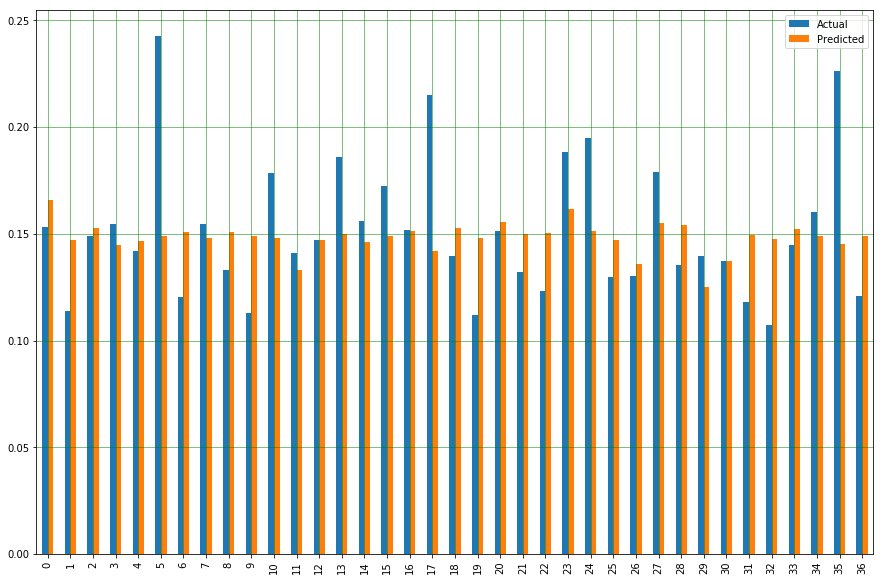

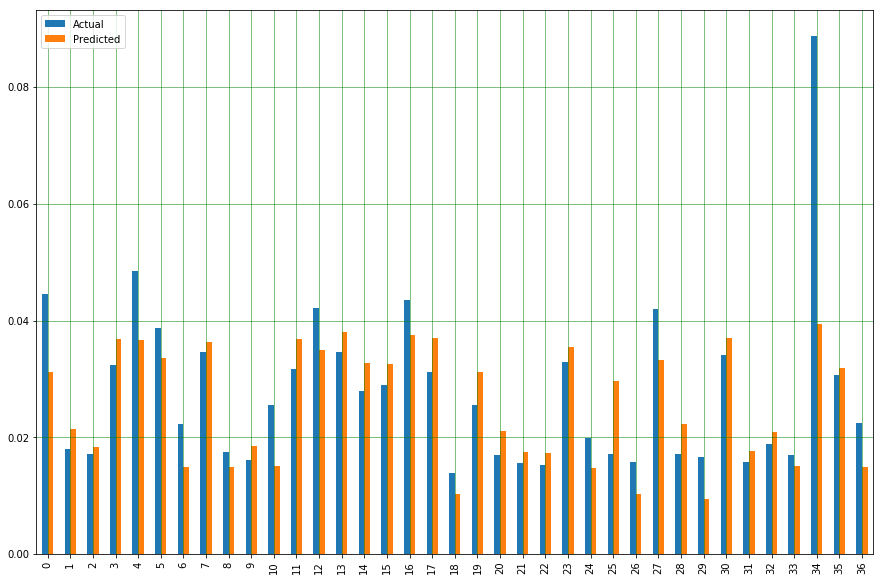

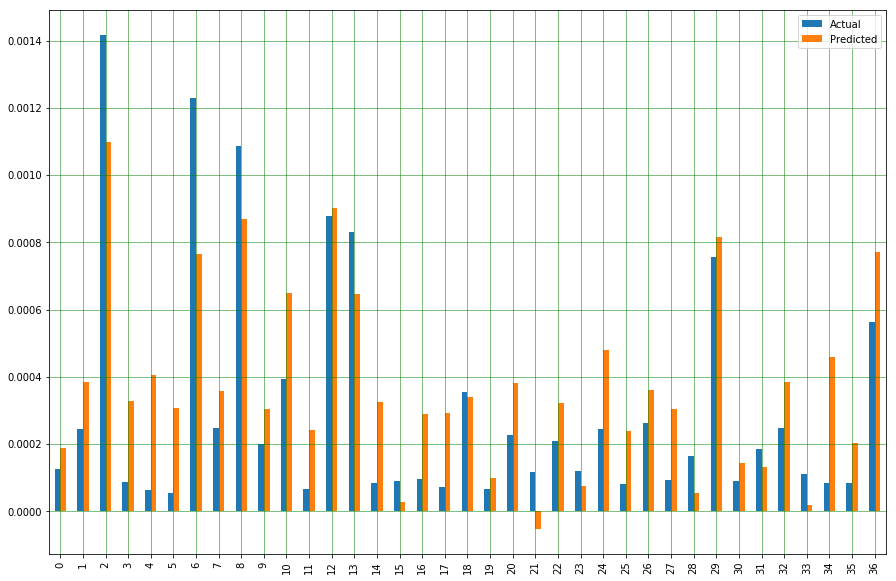

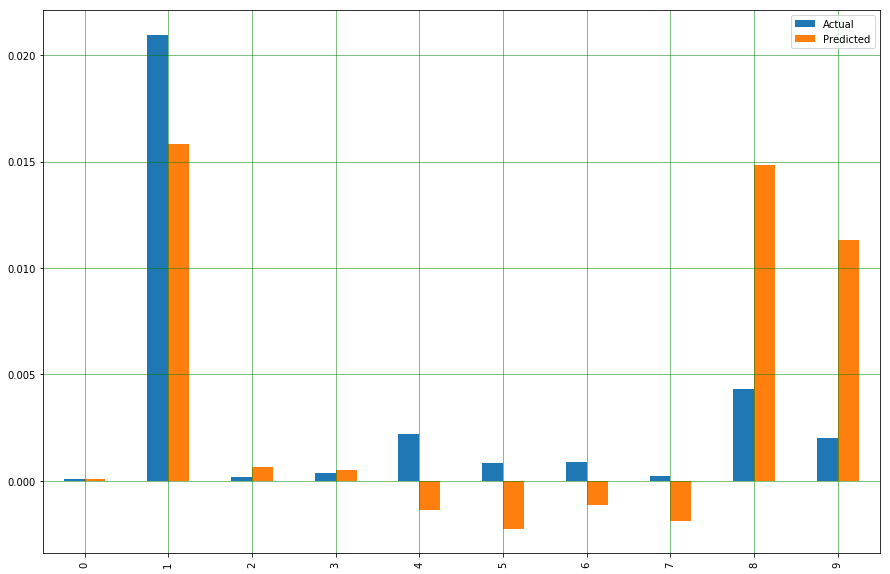

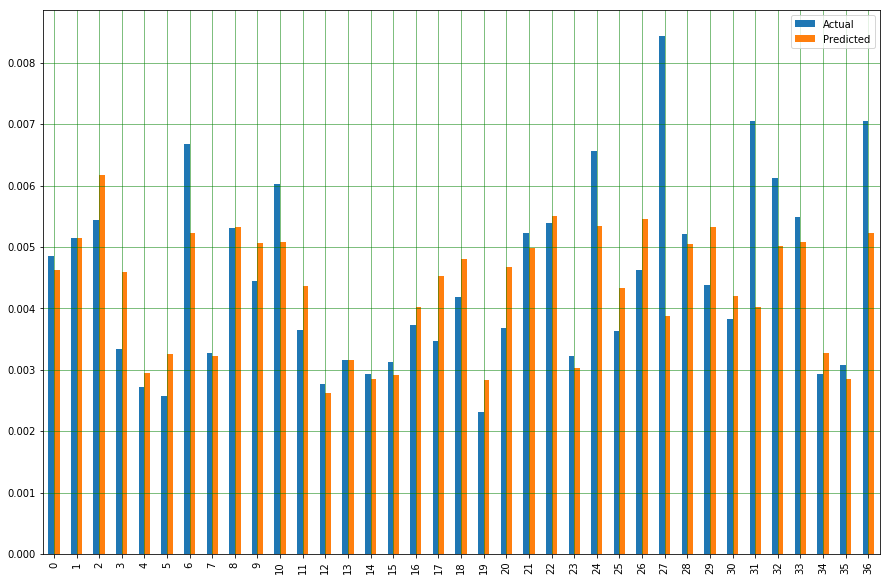

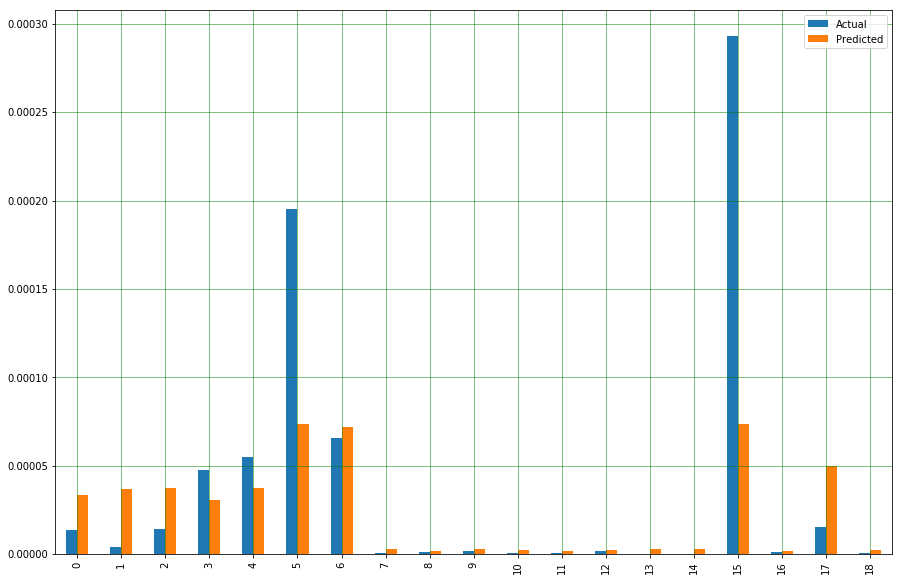

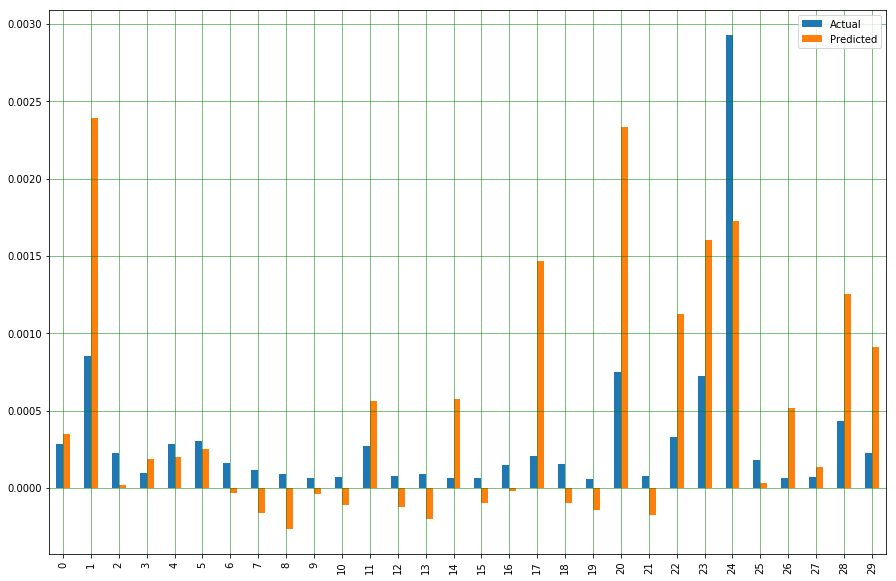

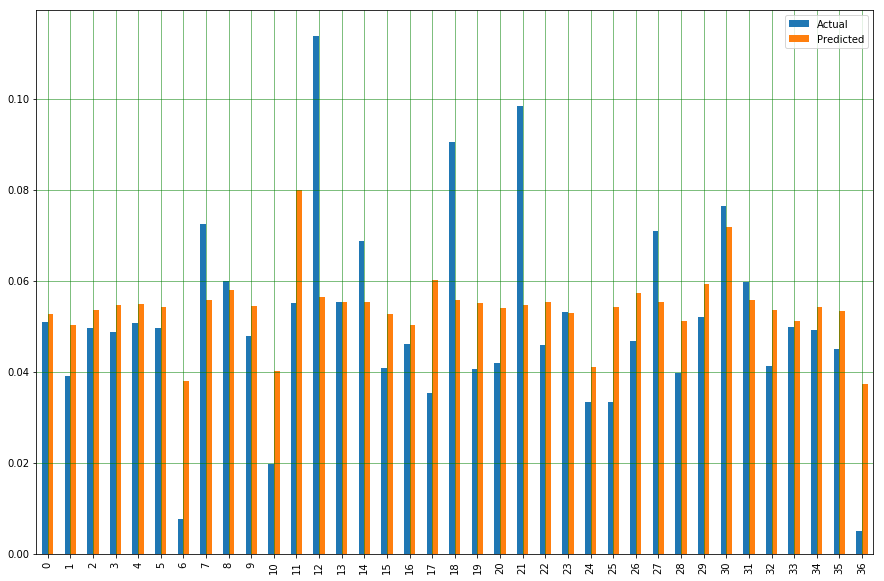

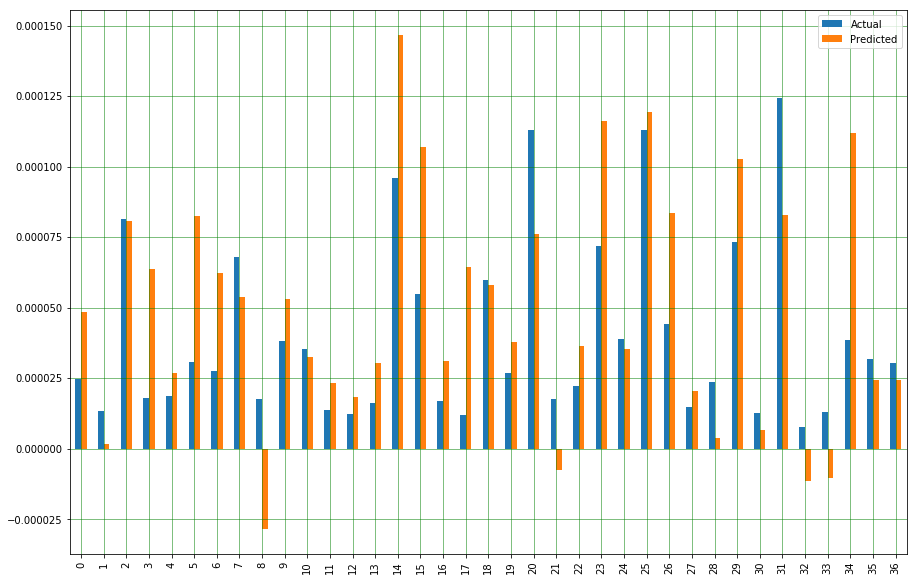

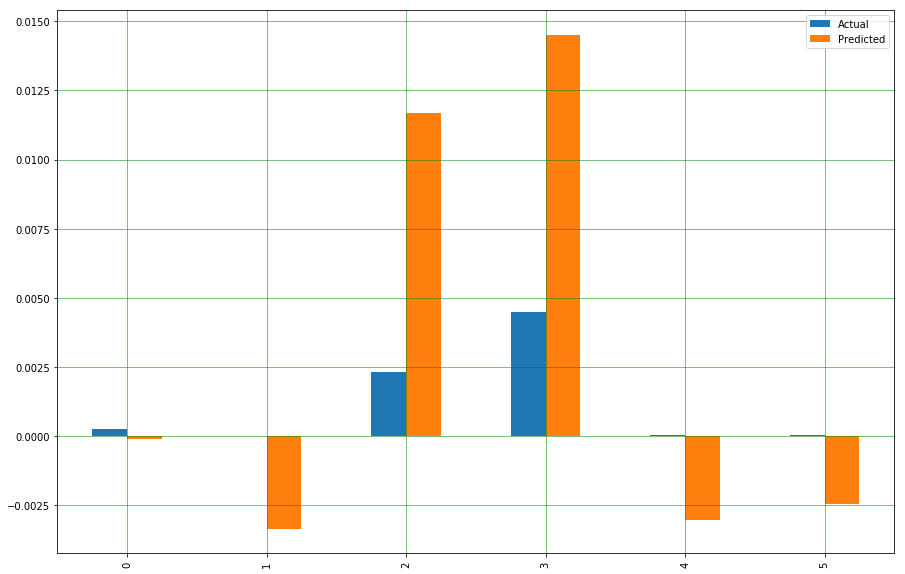

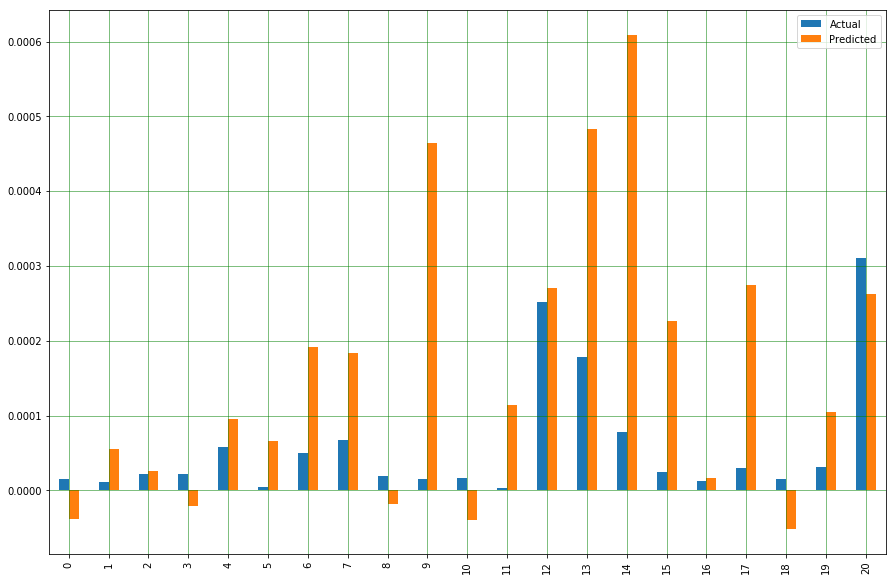

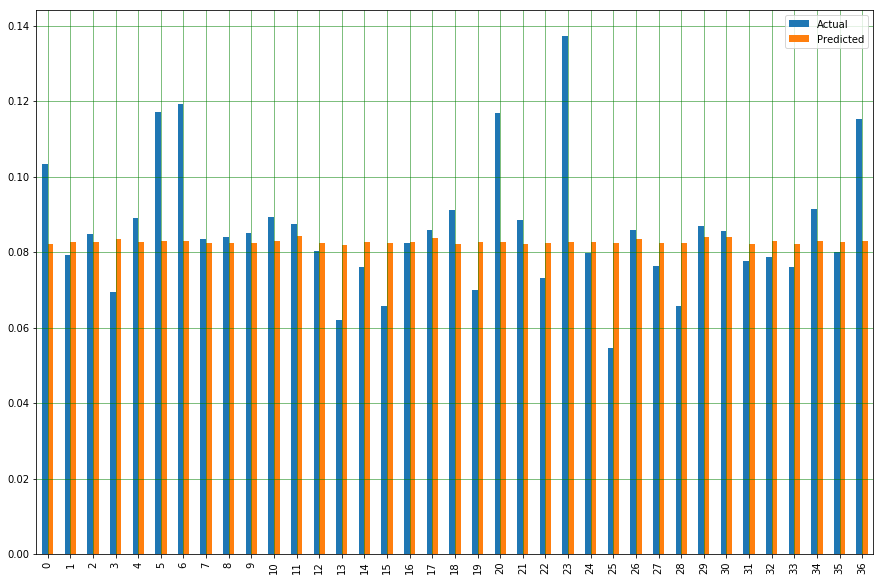

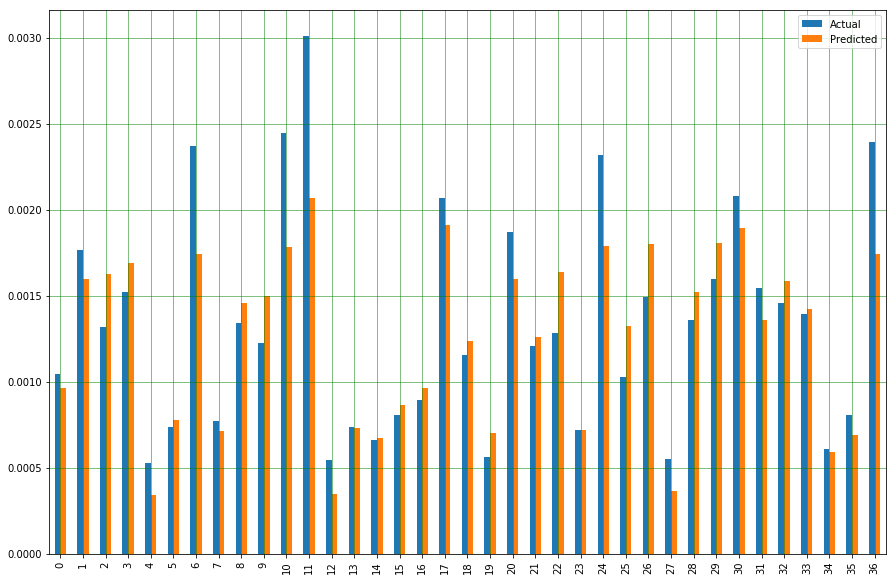

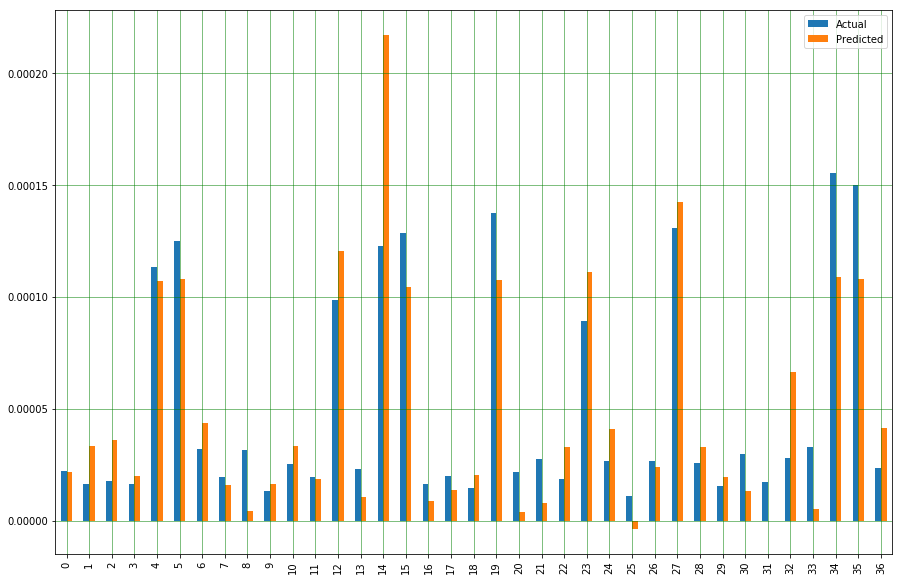

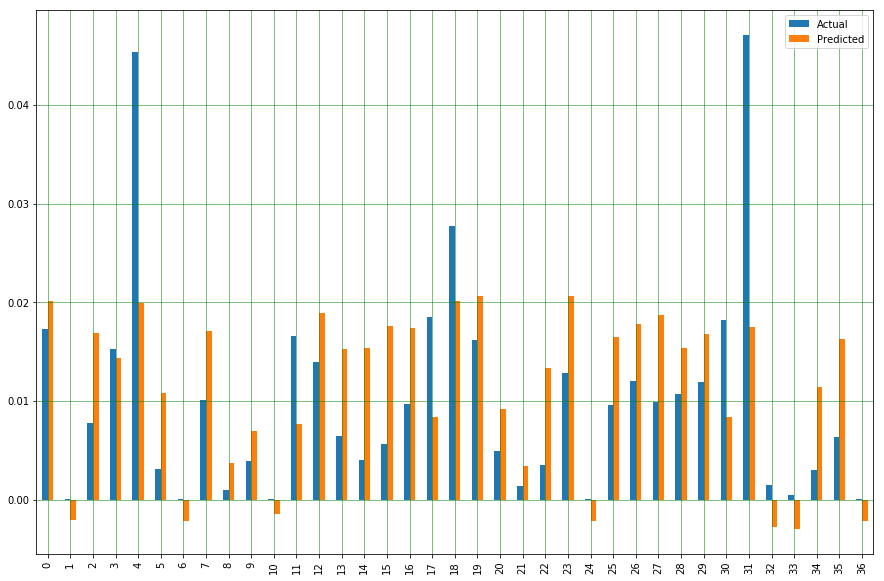

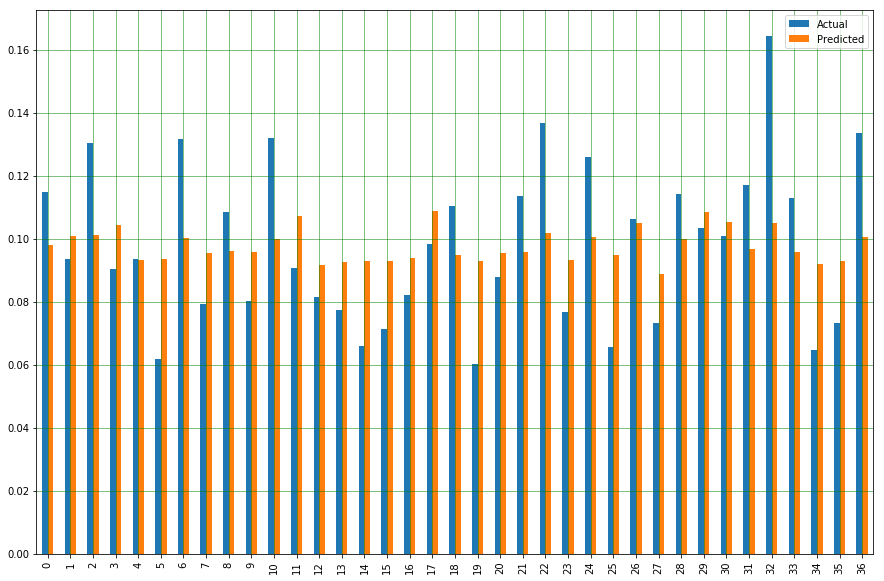

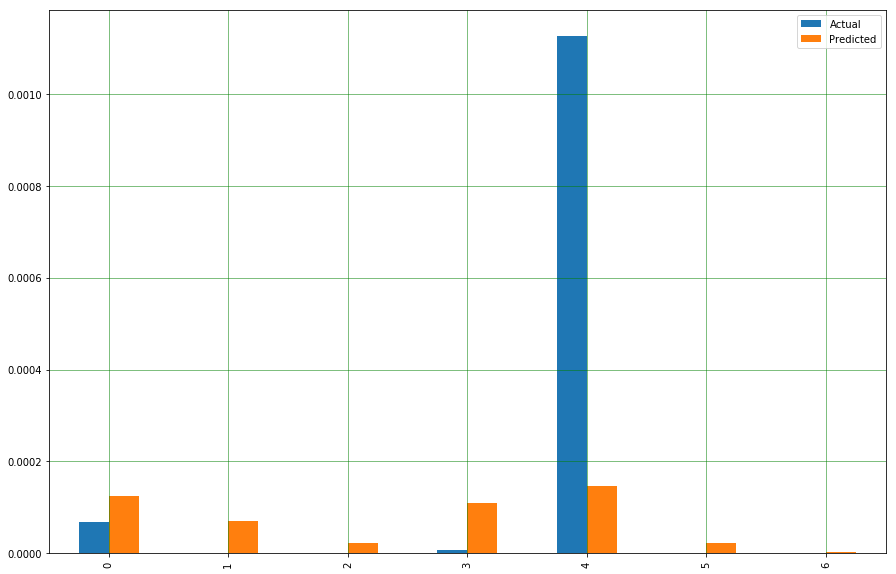

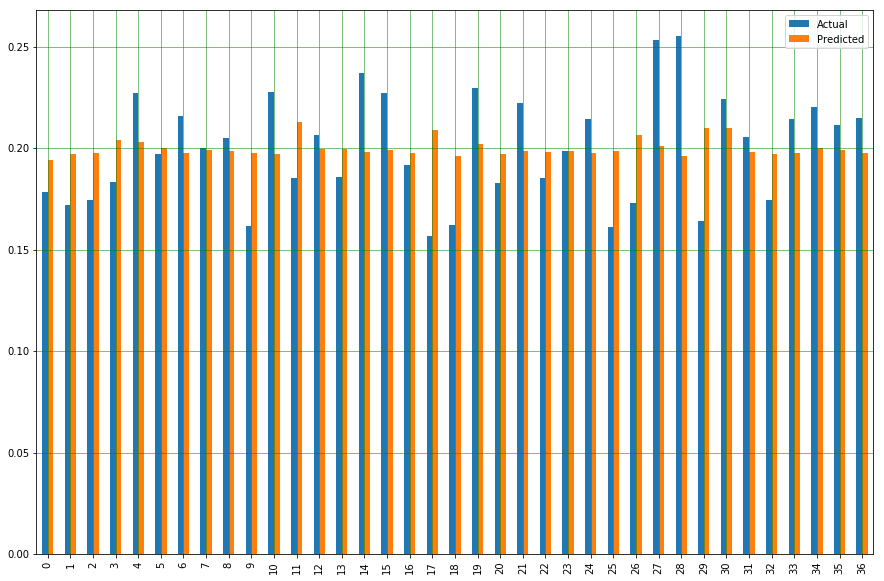

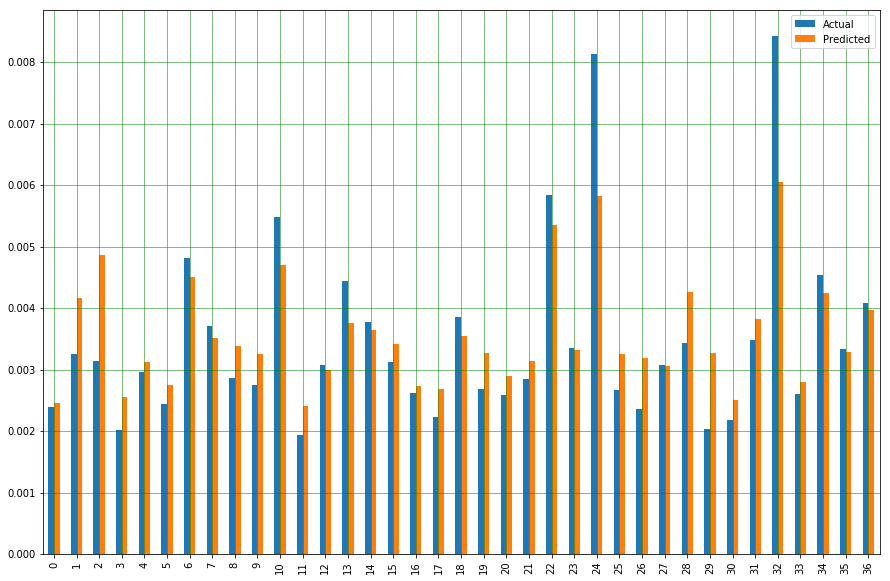

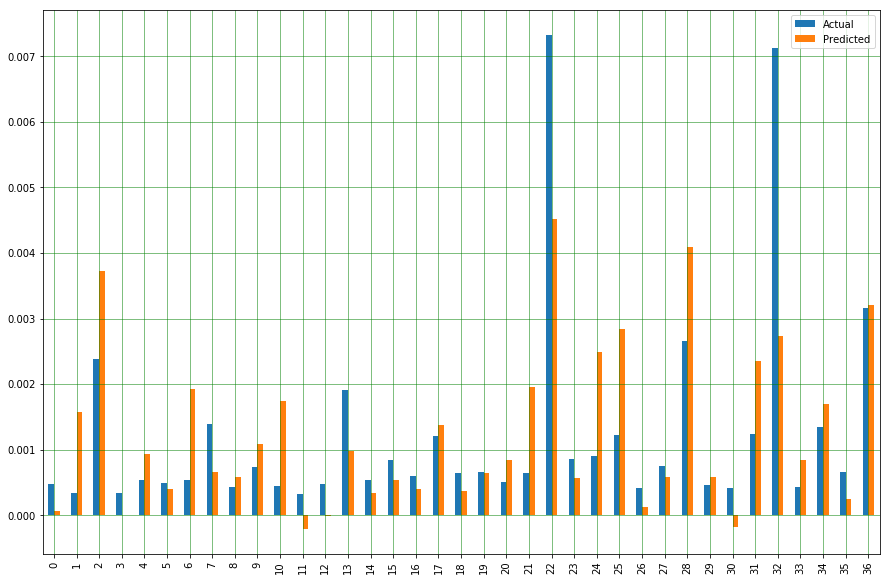

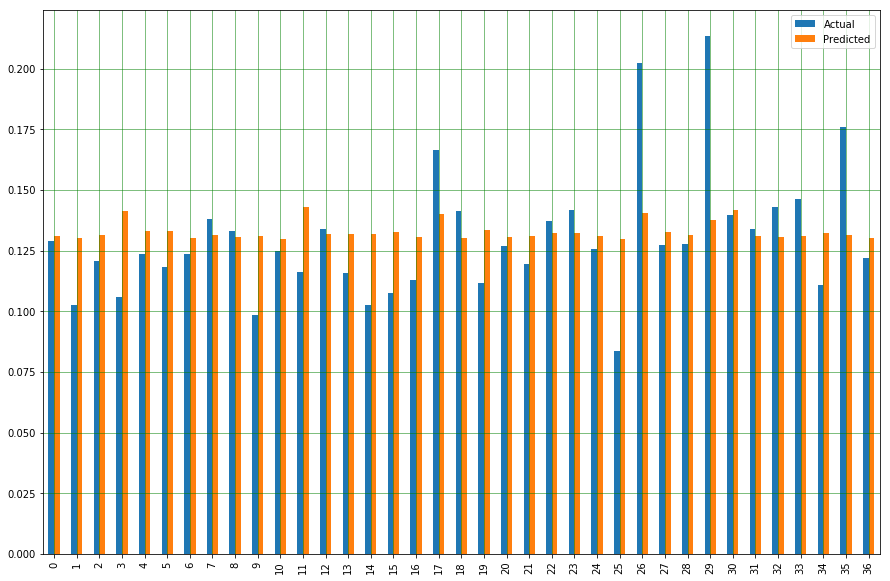

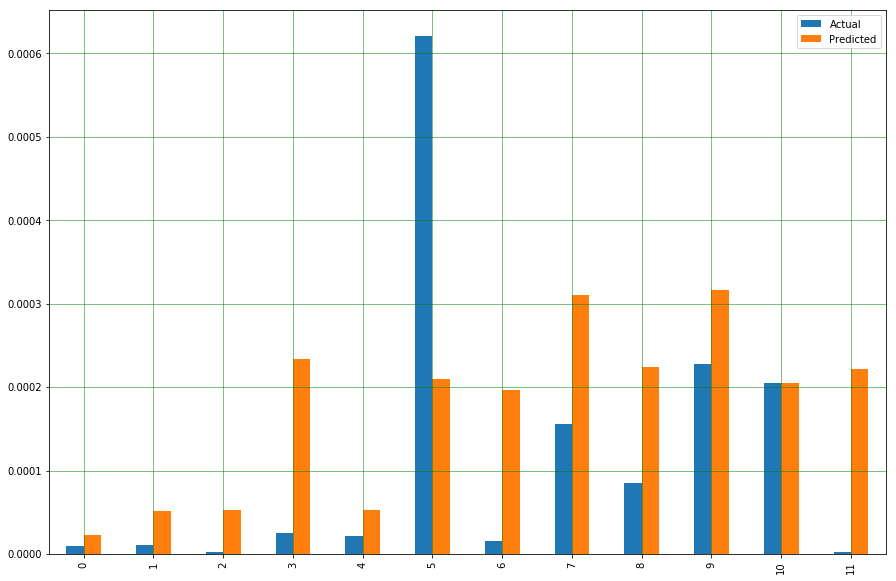

In [16]:
for uid in range(71):
    model, c, df_pred = get_uid_model(uid, df)
    show_plt(df_pred)